In [269]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import re


In [270]:
df=pd.read_csv("const2.csv")
df

,Unnamed: 0,#,Summary Nr,Event Date,Report ID,Fatality,SIC,NAICS,Event Description,abstract,keyword,date,age,sex,degree,nature,occupation,inj
0,NaN,1,1.596540e+05,08/31/2023,625500,X,NaN,238220.0,Employee Dies From Head Trauma In Fall While F...,"['Abstract: \nAt 11:00 a.m. on August 31, 2023...","['Keywords: \nblunt force, blunt force trauma,...",09/07/2023,44.0,M,Fatality,NaN,Personnel and labor relations managers,NaN
1,NaN,2,1.596080e+05,08/30/2023,626300,X,NaN,238130.0,Employee Dies Of Head Trauma In Fall Attaching...,"['Abstract: \nAt 4:45 p.m. on August 30, 2023,...","['Keywords: \nanchor, blunt force, blunt force...",09/05/2023,25.0,M,Fatality,NaN,Construction laborers,Distance of Fall: 20 feet Worker Height Above ...
2,NaN,3,1.595770e+05,08/30/2023,552700,X,NaN,237310.0,Employee Is Killed When Struck By Dump Truck,"[""Abstract: \nAt 12:00 a.m. on August 30, 2023...","['Keywords: \nasphalt, blunt force, crushed, d...",08/31/2023,53.0,M,Fatality,NaN,Occupation not reported,NaN
3,NaN,4,1.595760e+05,08/30/2023,953220,X,NaN,238130.0,Employee Is Killed In Fall From Truss,"['Abstract: \nAt 2:00 p.m. on August 30, 2023,...","['Keywords: \nconcrete, fall, fall from elevat...",09/01/2023,64.0,M,Fatality,NaN,Construction laborers,Distance of Fall: 10 feet Worker Height Above ...
4,NaN,5,1.595530e+05,08/29/2023,419730,X,NaN,238160.0,Employee Is Killed In Fall From Roof,"['Abstract: \nAt 2:00 p.m. on August 29, 2023,...","['Keywords: \nabdomen, adhesive, blunt force t...",08/31/2023,30.0,M,Fatality,NaN,Roofers,Distance of Fall: 18 feet Worker Height Above ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,NaN,17356,1.710444e+08,05/22/2008,950621,NaN,1731,238210.0,Employee'S Head Is Injured In Fall From Teleph...,"['Abstract: \nOn May 22, 2008, Employee #1, of...","['Keywords: \nhead, demolition, construction, ...",05/30/2008,NaN,NaN,Hospitalized injury,Concussion,Electrical and electronic technicians,Distance of Fall: feet Worker Height Above Gro...
17356,NaN,17357,2.020051e+08,05/21/2008,317000,X,1761,238160.0,Employee Dies After Fall From Roof,"['Abstract: \nOn May 21, 2008, Employee #1, a ...","['Keywords: \nhead, roof, construction, roofer...",05/21/2008,NaN,NaN,Fatality,Concussion,Roofers,Distance of Fall: feet Worker Height Above Gro...
17357,NaN,17358,1.254743e+08,05/21/2008,950615,NaN,1721,238320.0,Employee'S Head Is Injured In Fall From Ladder,['Abstract: \nAt approximately 2:15 p.m. on Ma...,"['Keywords: \nhead, extension ladder, construc...",06/02/2008,NaN,NaN,Hospitalized injury,Concussion,"Painters, construction and maintenance",Distance of Fall: feet Worker Height Above Gro...
17358,NaN,17359,2.025390e+08,05/21/2008,950641,NaN,1731,238210.0,Electrician Is Burned By Arc Flash At Electric...,"['Abstract: \nAt approximately 3:30 PM, on May...","['Keywords: \nburn, electric arc, electrician,...",05/22/2008,NaN,NaN,Hospitalized injury,Burn/Scald(Heat),Occupation not reported,Distance of Fall: feet Worker Height Above Gro...


In [271]:
import re

time_pattern = r'(\d{1,2}:\d{2}\s*(?:[ap]\.?m\.?|AM|PM|a\.?m\.?|p\.?m\.?))'

# Extract the time using regex and create a new column "Time"
df['Time'] = df['abstract'].str.extract(time_pattern)



In [272]:
df=df.drop(["Unnamed: 0","#","Summary Nr","Report ID","SIC","Fatality","nature","inj"],axis=1)


In [273]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17360 entries, 0 to 17359
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Event Date         17360 non-null  object 
 1   NAICS              17215 non-null  float64
 2   Event Description  17360 non-null  object 
 3   abstract           17360 non-null  object 
 4   keyword            17360 non-null  object 
 5   date               17357 non-null  object 
 6   age                11871 non-null  float64
 7   sex                11880 non-null  object 
 8   degree             17276 non-null  object 
 9   occupation         16784 non-null  object 
 10  Time               13425 non-null  object 
dtypes: float64(2), object(9)
memory usage: 1.5+ MB


In [274]:
df['Time'].isna().sum()

3935

In [275]:
df["Event Date"]=pd.to_datetime(df["Event Date"]) 
df["day_of_week"]=df["Event Date"].dt.dayofweek
df["Day_of_Week"]=df["Event Date"].dt.day_name()
df["Month"]=df["Event Date"].dt.month
df["month_name"]=df["Event Date"].dt.month_name()
df["year"]=df["Event Date"].dt.year
df["day"]=df["Event Date"].dt.day



In [276]:


# Forward fill missing values
df['Time'] = df['Time'].ffill()
df['Time']=df['Time'].bfill()
df

,Event Date,NAICS,Event Description,abstract,keyword,date,age,sex,degree,occupation,Time,day_of_week,Day_of_Week,Month,month_name,year,day
0,2023-08-31,238220.0,Employee Dies From Head Trauma In Fall While F...,"['Abstract: \nAt 11:00 a.m. on August 31, 2023...","['Keywords: \nblunt force, blunt force trauma,...",09/07/2023,44.0,M,Fatality,Personnel and labor relations managers,11:00 a.m.,3,Thursday,8,August,2023,31
1,2023-08-30,238130.0,Employee Dies Of Head Trauma In Fall Attaching...,"['Abstract: \nAt 4:45 p.m. on August 30, 2023,...","['Keywords: \nanchor, blunt force, blunt force...",09/05/2023,25.0,M,Fatality,Construction laborers,4:45 p.m.,2,Wednesday,8,August,2023,30
2,2023-08-30,237310.0,Employee Is Killed When Struck By Dump Truck,"[""Abstract: \nAt 12:00 a.m. on August 30, 2023...","['Keywords: \nasphalt, blunt force, crushed, d...",08/31/2023,53.0,M,Fatality,Occupation not reported,12:00 a.m.,2,Wednesday,8,August,2023,30
3,2023-08-30,238130.0,Employee Is Killed In Fall From Truss,"['Abstract: \nAt 2:00 p.m. on August 30, 2023,...","['Keywords: \nconcrete, fall, fall from elevat...",09/01/2023,64.0,M,Fatality,Construction laborers,2:00 p.m.,2,Wednesday,8,August,2023,30
4,2023-08-29,238160.0,Employee Is Killed In Fall From Roof,"['Abstract: \nAt 2:00 p.m. on August 29, 2023,...","['Keywords: \nabdomen, adhesive, blunt force t...",08/31/2023,30.0,M,Fatality,Roofers,2:00 p.m.,1,Tuesday,8,August,2023,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,2008-05-22,238210.0,Employee'S Head Is Injured In Fall From Teleph...,"['Abstract: \nOn May 22, 2008, Employee #1, of...","['Keywords: \nhead, demolition, construction, ...",05/30/2008,NaN,NaN,Hospitalized injury,Electrical and electronic technicians,12:42 p.m.,3,Thursday,5,May,2008,22
17356,2008-05-21,238160.0,Employee Dies After Fall From Roof,"['Abstract: \nOn May 21, 2008, Employee #1, a ...","['Keywords: \nhead, roof, construction, roofer...",05/21/2008,NaN,NaN,Fatality,Roofers,12:42 p.m.,2,Wednesday,5,May,2008,21
17357,2008-05-21,238320.0,Employee'S Head Is Injured In Fall From Ladder,['Abstract: \nAt approximately 2:15 p.m. on Ma...,"['Keywords: \nhead, extension ladder, construc...",06/02/2008,NaN,NaN,Hospitalized injury,"Painters, construction and maintenance",2:15 p.m.,2,Wednesday,5,May,2008,21
17358,2008-05-21,238210.0,Electrician Is Burned By Arc Flash At Electric...,"['Abstract: \nAt approximately 3:30 PM, on May...","['Keywords: \nburn, electric arc, electrician,...",05/22/2008,NaN,NaN,Hospitalized injury,Occupation not reported,3:30 PM,2,Wednesday,5,May,2008,21


In [277]:
df.columns

Index(['Event Date', 'NAICS', 'Event Description', 'abstract', 'keyword',
       'date', 'age', 'sex', 'degree', 'occupation', 'Time', 'day_of_week',
       'Day_of_Week', 'Month', 'month_name', 'year', 'day'],
      dtype='object')

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17360 entries, 0 to 17359
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Event Date         17360 non-null  datetime64[ns]
 1   NAICS              17215 non-null  float64       
 2   Event Description  17360 non-null  object        
 3   abstract           17360 non-null  object        
 4   keyword            17360 non-null  object        
 5   date               17357 non-null  object        
 6   age                11871 non-null  float64       
 7   sex                11880 non-null  object        
 8   degree             17276 non-null  object        
 9   occupation         16784 non-null  object        
 10  Time               17360 non-null  object        
 11  day_of_week        17360 non-null  int32         
 12  Day_of_Week        17360 non-null  object        
 13  Month              17360 non-null  int32         
 14  month_

/var/folders/2g/ngjdw0bx2xzff_6zbb624q740000gn/T/ipykernel_38454/512310265.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')


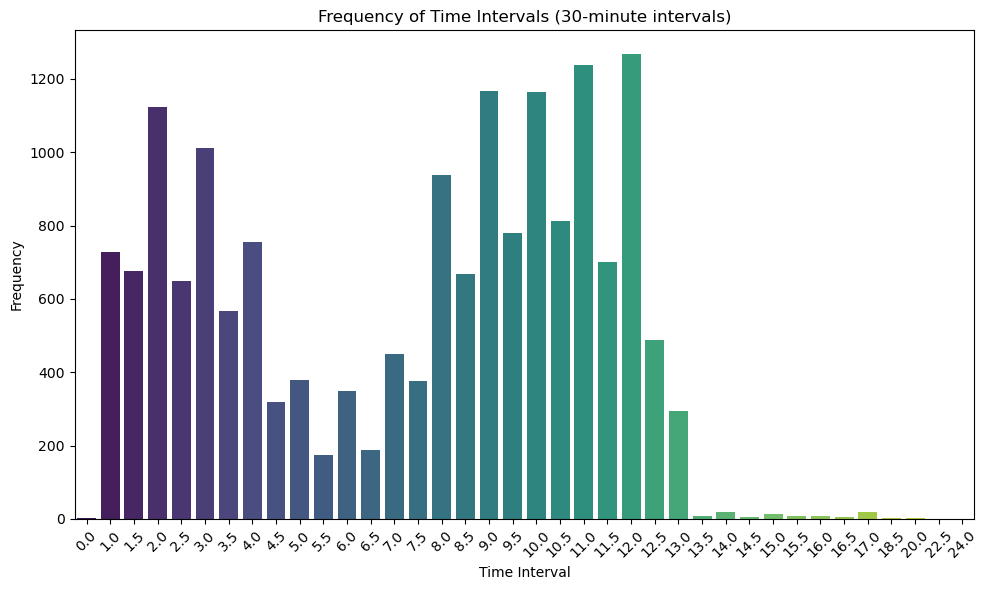

In [279]:
df['Time'] = df['Time'].str.replace(' p.m.', '').str.replace(' a.m.', '')

# Convert 'Time' column to datetime with specified format
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Drop rows with NaT (Not a Time) values
df = df.dropna(subset=['Time'])

# Extract hour and minute separately
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute

# Aggregate time into broader intervals, e.g., 30-minute intervals
df['time_interval'] = df['hour'] + df['minute'] / 60
df['time_interval'] = df['time_interval'].apply(lambda x: round(x * 2) / 2)  # Round to nearest 0.5

# Plot the frequency of time intervals
plt.figure(figsize=(10, 6))
sns.countplot(x='time_interval', data=df, palette='viridis')
plt.xlabel('Time Interval')
plt.ylabel('Frequency')
plt.title('Frequency of Time Intervals (30-minute intervals)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [280]:


# Remove "Keywords:" prefix and "\n" characters from the 'Keywords' column
df['Keywords'] = df['keyword'].str.replace('Keywords:', '')

# Print the DataFrame with removed prefix and newline characters
df

,Event Date,NAICS,Event Description,abstract,keyword,date,age,sex,degree,occupation,...,day_of_week,Day_of_Week,Month,month_name,year,day,hour,minute,time_interval,Keywords
0,2023-08-31,238220.0,Employee Dies From Head Trauma In Fall While F...,"['Abstract: \nAt 11:00 a.m. on August 31, 2023...","['Keywords: \nblunt force, blunt force trauma,...",09/07/2023,44.0,M,Fatality,Personnel and labor relations managers,...,3,Thursday,8,August,2023,31,11,0,11.0,"[' \nblunt force, blunt force trauma, concrete..."
1,2023-08-30,238130.0,Employee Dies Of Head Trauma In Fall Attaching...,"['Abstract: \nAt 4:45 p.m. on August 30, 2023,...","['Keywords: \nanchor, blunt force, blunt force...",09/05/2023,25.0,M,Fatality,Construction laborers,...,2,Wednesday,8,August,2023,30,4,45,5.0,"[' \nanchor, blunt force, blunt force trauma, ..."
2,2023-08-30,237310.0,Employee Is Killed When Struck By Dump Truck,"[""Abstract: \nAt 12:00 a.m. on August 30, 2023...","['Keywords: \nasphalt, blunt force, crushed, d...",08/31/2023,53.0,M,Fatality,Occupation not reported,...,2,Wednesday,8,August,2023,30,12,0,12.0,"[' \nasphalt, blunt force, crushed, dump truck..."
3,2023-08-30,238130.0,Employee Is Killed In Fall From Truss,"['Abstract: \nAt 2:00 p.m. on August 30, 2023,...","['Keywords: \nconcrete, fall, fall from elevat...",09/01/2023,64.0,M,Fatality,Construction laborers,...,2,Wednesday,8,August,2023,30,2,0,2.0,"[' \nconcrete, fall, fall from elevation, frac..."
4,2023-08-29,238160.0,Employee Is Killed In Fall From Roof,"['Abstract: \nAt 2:00 p.m. on August 29, 2023,...","['Keywords: \nabdomen, adhesive, blunt force t...",08/31/2023,30.0,M,Fatality,Roofers,...,1,Tuesday,8,August,2023,29,2,0,2.0,"[' \nabdomen, adhesive, blunt force trauma, co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,2008-05-22,238210.0,Employee'S Head Is Injured In Fall From Teleph...,"['Abstract: \nOn May 22, 2008, Employee #1, of...","['Keywords: \nhead, demolition, construction, ...",05/30/2008,NaN,NaN,Hospitalized injury,Electrical and electronic technicians,...,3,Thursday,5,May,2008,22,12,42,12.5,"[' \nhead, demolition, construction, fall, con..."
17356,2008-05-21,238160.0,Employee Dies After Fall From Roof,"['Abstract: \nOn May 21, 2008, Employee #1, a ...","['Keywords: \nhead, roof, construction, roofer...",05/21/2008,NaN,NaN,Fatality,Roofers,...,2,Wednesday,5,May,2008,21,12,42,12.5,"[' \nhead, roof, construction, roofer, fall, c..."
17357,2008-05-21,238320.0,Employee'S Head Is Injured In Fall From Ladder,['Abstract: \nAt approximately 2:15 p.m. on Ma...,"['Keywords: \nhead, extension ladder, construc...",06/02/2008,NaN,NaN,Hospitalized injury,"Painters, construction and maintenance",...,2,Wednesday,5,May,2008,21,2,15,2.0,"[' \nhead, extension ladder, construction, fal..."
17358,2008-05-21,238210.0,Electrician Is Burned By Arc Flash At Electric...,"['Abstract: \nAt approximately 3:30 PM, on May...","['Keywords: \nburn, electric arc, electrician,...",05/22/2008,NaN,NaN,Hospitalized injury,Occupation not reported,...,2,Wednesday,5,May,2008,21,15,30,15.5,"[' \nburn, electric arc, electrician, construc..."


In [281]:

df['new_Keywords'] = df['Keywords'].str.replace(' \nautomatic machine', '')

df

,Event Date,NAICS,Event Description,abstract,keyword,date,age,sex,degree,occupation,...,Day_of_Week,Month,month_name,year,day,hour,minute,time_interval,Keywords,new_Keywords
0,2023-08-31,238220.0,Employee Dies From Head Trauma In Fall While F...,"['Abstract: \nAt 11:00 a.m. on August 31, 2023...","['Keywords: \nblunt force, blunt force trauma,...",09/07/2023,44.0,M,Fatality,Personnel and labor relations managers,...,Thursday,8,August,2023,31,11,0,11.0,"[' \nblunt force, blunt force trauma, concrete...","[' \nblunt force, blunt force trauma, concrete..."
1,2023-08-30,238130.0,Employee Dies Of Head Trauma In Fall Attaching...,"['Abstract: \nAt 4:45 p.m. on August 30, 2023,...","['Keywords: \nanchor, blunt force, blunt force...",09/05/2023,25.0,M,Fatality,Construction laborers,...,Wednesday,8,August,2023,30,4,45,5.0,"[' \nanchor, blunt force, blunt force trauma, ...","[' \nanchor, blunt force, blunt force trauma, ..."
2,2023-08-30,237310.0,Employee Is Killed When Struck By Dump Truck,"[""Abstract: \nAt 12:00 a.m. on August 30, 2023...","['Keywords: \nasphalt, blunt force, crushed, d...",08/31/2023,53.0,M,Fatality,Occupation not reported,...,Wednesday,8,August,2023,30,12,0,12.0,"[' \nasphalt, blunt force, crushed, dump truck...","[' \nasphalt, blunt force, crushed, dump truck..."
3,2023-08-30,238130.0,Employee Is Killed In Fall From Truss,"['Abstract: \nAt 2:00 p.m. on August 30, 2023,...","['Keywords: \nconcrete, fall, fall from elevat...",09/01/2023,64.0,M,Fatality,Construction laborers,...,Wednesday,8,August,2023,30,2,0,2.0,"[' \nconcrete, fall, fall from elevation, frac...","[' \nconcrete, fall, fall from elevation, frac..."
4,2023-08-29,238160.0,Employee Is Killed In Fall From Roof,"['Abstract: \nAt 2:00 p.m. on August 29, 2023,...","['Keywords: \nabdomen, adhesive, blunt force t...",08/31/2023,30.0,M,Fatality,Roofers,...,Tuesday,8,August,2023,29,2,0,2.0,"[' \nabdomen, adhesive, blunt force trauma, co...","[' \nabdomen, adhesive, blunt force trauma, co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,2008-05-22,238210.0,Employee'S Head Is Injured In Fall From Teleph...,"['Abstract: \nOn May 22, 2008, Employee #1, of...","['Keywords: \nhead, demolition, construction, ...",05/30/2008,NaN,NaN,Hospitalized injury,Electrical and electronic technicians,...,Thursday,5,May,2008,22,12,42,12.5,"[' \nhead, demolition, construction, fall, con...","[' \nhead, demolition, construction, fall, con..."
17356,2008-05-21,238160.0,Employee Dies After Fall From Roof,"['Abstract: \nOn May 21, 2008, Employee #1, a ...","['Keywords: \nhead, roof, construction, roofer...",05/21/2008,NaN,NaN,Fatality,Roofers,...,Wednesday,5,May,2008,21,12,42,12.5,"[' \nhead, roof, construction, roofer, fall, c...","[' \nhead, roof, construction, roofer, fall, c..."
17357,2008-05-21,238320.0,Employee'S Head Is Injured In Fall From Ladder,['Abstract: \nAt approximately 2:15 p.m. on Ma...,"['Keywords: \nhead, extension ladder, construc...",06/02/2008,NaN,NaN,Hospitalized injury,"Painters, construction and maintenance",...,Wednesday,5,May,2008,21,2,15,2.0,"[' \nhead, extension ladder, construction, fal...","[' \nhead, extension ladder, construction, fal..."
17358,2008-05-21,238210.0,Electrician Is Burned By Arc Flash At Electric...,"['Abstract: \nAt approximately 3:30 PM, on May...","['Keywords: \nburn, electric arc, electrician,...",05/22/2008,NaN,NaN,Hospitalized injury,Occupation not reported,...,Wednesday,5,May,2008,21,15,30,15.5,"[' \nburn, electric arc, electrician, construc...","[' \nburn, electric arc, electrician, construc..."


In [282]:
df['Keyword'] = df['new_Keywords'].str.replace(r'^ \n', '', regex=True)

# Print the DataFrame with '\n' characters removed
df

,Event Date,NAICS,Event Description,abstract,keyword,date,age,sex,degree,occupation,...,Month,month_name,year,day,hour,minute,time_interval,Keywords,new_Keywords,Keyword
0,2023-08-31,238220.0,Employee Dies From Head Trauma In Fall While F...,"['Abstract: \nAt 11:00 a.m. on August 31, 2023...","['Keywords: \nblunt force, blunt force trauma,...",09/07/2023,44.0,M,Fatality,Personnel and labor relations managers,...,8,August,2023,31,11,0,11.0,"[' \nblunt force, blunt force trauma, concrete...","[' \nblunt force, blunt force trauma, concrete...","[' \nblunt force, blunt force trauma, concrete..."
1,2023-08-30,238130.0,Employee Dies Of Head Trauma In Fall Attaching...,"['Abstract: \nAt 4:45 p.m. on August 30, 2023,...","['Keywords: \nanchor, blunt force, blunt force...",09/05/2023,25.0,M,Fatality,Construction laborers,...,8,August,2023,30,4,45,5.0,"[' \nanchor, blunt force, blunt force trauma, ...","[' \nanchor, blunt force, blunt force trauma, ...","[' \nanchor, blunt force, blunt force trauma, ..."
2,2023-08-30,237310.0,Employee Is Killed When Struck By Dump Truck,"[""Abstract: \nAt 12:00 a.m. on August 30, 2023...","['Keywords: \nasphalt, blunt force, crushed, d...",08/31/2023,53.0,M,Fatality,Occupation not reported,...,8,August,2023,30,12,0,12.0,"[' \nasphalt, blunt force, crushed, dump truck...","[' \nasphalt, blunt force, crushed, dump truck...","[' \nasphalt, blunt force, crushed, dump truck..."
3,2023-08-30,238130.0,Employee Is Killed In Fall From Truss,"['Abstract: \nAt 2:00 p.m. on August 30, 2023,...","['Keywords: \nconcrete, fall, fall from elevat...",09/01/2023,64.0,M,Fatality,Construction laborers,...,8,August,2023,30,2,0,2.0,"[' \nconcrete, fall, fall from elevation, frac...","[' \nconcrete, fall, fall from elevation, frac...","[' \nconcrete, fall, fall from elevation, frac..."
4,2023-08-29,238160.0,Employee Is Killed In Fall From Roof,"['Abstract: \nAt 2:00 p.m. on August 29, 2023,...","['Keywords: \nabdomen, adhesive, blunt force t...",08/31/2023,30.0,M,Fatality,Roofers,...,8,August,2023,29,2,0,2.0,"[' \nabdomen, adhesive, blunt force trauma, co...","[' \nabdomen, adhesive, blunt force trauma, co...","[' \nabdomen, adhesive, blunt force trauma, co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,2008-05-22,238210.0,Employee'S Head Is Injured In Fall From Teleph...,"['Abstract: \nOn May 22, 2008, Employee #1, of...","['Keywords: \nhead, demolition, construction, ...",05/30/2008,NaN,NaN,Hospitalized injury,Electrical and electronic technicians,...,5,May,2008,22,12,42,12.5,"[' \nhead, demolition, construction, fall, con...","[' \nhead, demolition, construction, fall, con...","[' \nhead, demolition, construction, fall, con..."
17356,2008-05-21,238160.0,Employee Dies After Fall From Roof,"['Abstract: \nOn May 21, 2008, Employee #1, a ...","['Keywords: \nhead, roof, construction, roofer...",05/21/2008,NaN,NaN,Fatality,Roofers,...,5,May,2008,21,12,42,12.5,"[' \nhead, roof, construction, roofer, fall, c...","[' \nhead, roof, construction, roofer, fall, c...","[' \nhead, roof, construction, roofer, fall, c..."
17357,2008-05-21,238320.0,Employee'S Head Is Injured In Fall From Ladder,['Abstract: \nAt approximately 2:15 p.m. on Ma...,"['Keywords: \nhead, extension ladder, construc...",06/02/2008,NaN,NaN,Hospitalized injury,"Painters, construction and maintenance",...,5,May,2008,21,2,15,2.0,"[' \nhead, extension ladder, construction, fal...","[' \nhead, extension ladder, construction, fal...","[' \nhead, extension ladder, construction, fal..."
17358,2008-05-21,238210.0,Electrician Is Burned By Arc Flash At Electric...,"['Abstract: \nAt approximately 3:30 PM, on May...","['Keywords: \nburn, electric arc, electrician,...",05/22/2008,NaN,NaN,Hospitalized injury,Occupation not reported,...,5,May,2008,21,15,30,15.5,"[' \nburn, electric arc, electrician, construc...","[' \nburn, electric arc, electrician, construc...","[' \nburn, electric arc, electrician, construc..."


In [283]:
df['Keywords']=df['Keywords'].str.upper()
df

,Event Date,NAICS,Event Description,abstract,keyword,date,age,sex,degree,occupation,...,Month,month_name,year,day,hour,minute,time_interval,Keywords,new_Keywords,Keyword
0,2023-08-31,238220.0,Employee Dies From Head Trauma In Fall While F...,"['Abstract: \nAt 11:00 a.m. on August 31, 2023...","['Keywords: \nblunt force, blunt force trauma,...",09/07/2023,44.0,M,Fatality,Personnel and labor relations managers,...,8,August,2023,31,11,0,11.0,"[' \NBLUNT FORCE, BLUNT FORCE TRAUMA, CONCRETE...","[' \nblunt force, blunt force trauma, concrete...","[' \nblunt force, blunt force trauma, concrete..."
1,2023-08-30,238130.0,Employee Dies Of Head Trauma In Fall Attaching...,"['Abstract: \nAt 4:45 p.m. on August 30, 2023,...","['Keywords: \nanchor, blunt force, blunt force...",09/05/2023,25.0,M,Fatality,Construction laborers,...,8,August,2023,30,4,45,5.0,"[' \NANCHOR, BLUNT FORCE, BLUNT FORCE TRAUMA, ...","[' \nanchor, blunt force, blunt force trauma, ...","[' \nanchor, blunt force, blunt force trauma, ..."
2,2023-08-30,237310.0,Employee Is Killed When Struck By Dump Truck,"[""Abstract: \nAt 12:00 a.m. on August 30, 2023...","['Keywords: \nasphalt, blunt force, crushed, d...",08/31/2023,53.0,M,Fatality,Occupation not reported,...,8,August,2023,30,12,0,12.0,"[' \NASPHALT, BLUNT FORCE, CRUSHED, DUMP TRUCK...","[' \nasphalt, blunt force, crushed, dump truck...","[' \nasphalt, blunt force, crushed, dump truck..."
3,2023-08-30,238130.0,Employee Is Killed In Fall From Truss,"['Abstract: \nAt 2:00 p.m. on August 30, 2023,...","['Keywords: \nconcrete, fall, fall from elevat...",09/01/2023,64.0,M,Fatality,Construction laborers,...,8,August,2023,30,2,0,2.0,"[' \NCONCRETE, FALL, FALL FROM ELEVATION, FRAC...","[' \nconcrete, fall, fall from elevation, frac...","[' \nconcrete, fall, fall from elevation, frac..."
4,2023-08-29,238160.0,Employee Is Killed In Fall From Roof,"['Abstract: \nAt 2:00 p.m. on August 29, 2023,...","['Keywords: \nabdomen, adhesive, blunt force t...",08/31/2023,30.0,M,Fatality,Roofers,...,8,August,2023,29,2,0,2.0,"[' \NABDOMEN, ADHESIVE, BLUNT FORCE TRAUMA, CO...","[' \nabdomen, adhesive, blunt force trauma, co...","[' \nabdomen, adhesive, blunt force trauma, co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,2008-05-22,238210.0,Employee'S Head Is Injured In Fall From Teleph...,"['Abstract: \nOn May 22, 2008, Employee #1, of...","['Keywords: \nhead, demolition, construction, ...",05/30/2008,NaN,NaN,Hospitalized injury,Electrical and electronic technicians,...,5,May,2008,22,12,42,12.5,"[' \NHEAD, DEMOLITION, CONSTRUCTION, FALL, CON...","[' \nhead, demolition, construction, fall, con...","[' \nhead, demolition, construction, fall, con..."
17356,2008-05-21,238160.0,Employee Dies After Fall From Roof,"['Abstract: \nOn May 21, 2008, Employee #1, a ...","['Keywords: \nhead, roof, construction, roofer...",05/21/2008,NaN,NaN,Fatality,Roofers,...,5,May,2008,21,12,42,12.5,"[' \NHEAD, ROOF, CONSTRUCTION, ROOFER, FALL, C...","[' \nhead, roof, construction, roofer, fall, c...","[' \nhead, roof, construction, roofer, fall, c..."
17357,2008-05-21,238320.0,Employee'S Head Is Injured In Fall From Ladder,['Abstract: \nAt approximately 2:15 p.m. on Ma...,"['Keywords: \nhead, extension ladder, construc...",06/02/2008,NaN,NaN,Hospitalized injury,"Painters, construction and maintenance",...,5,May,2008,21,2,15,2.0,"[' \NHEAD, EXTENSION LADDER, CONSTRUCTION, FAL...","[' \nhead, extension ladder, construction, fal...","[' \nhead, extension ladder, construction, fal..."
17358,2008-05-21,238210.0,Electrician Is Burned By Arc Flash At Electric...,"['Abstract: \nAt approximately 3:30 PM, on May...","['Keywords: \nburn, electric arc, electrician,...",05/22/2008,NaN,NaN,Hospitalized injury,Occupation not reported,...,5,May,2008,21,15,30,15.5,"[' \NBURN, ELECTRIC ARC, ELECTRICIAN, CONSTRUC...","[' \nburn, electric arc, electrician, construc...","[' \nburn, electric arc, electrician, construc..."


In [284]:
df["Keywords"].str.count('HEAD').sum()


3016

In [285]:
word_for_env=['Caught in or between', 'Other', 'fall from elevation',
       'Struck-by', 'Card-vascular/resp. fail.', 'Shock',
       'Struck against', 'Inhalation', 'Fall (same level)', 'Absorption',
       'Rubbed/abraded', 'Bite/sting/scratch', 'Rep. Motion/pressure',
       'Ingestion']
pattern = '|'.join(word_for_env)
# Extract the words from the abstract column and create a new column
df['Event Type'] = df['abstract'].str.extractall(f'({pattern})').groupby(level=0)[0].apply(', '.join)
word_for_env = [
    'CAUGHT IN OR BETWEEN', 'OTHER', 'FALL FROM ELEVATION','FALL','STRUCK BY', 'CARDIOVASCULAR','RESPIRATORY' , 'SHOCK',
    'STRUCK AGAINST', 'INHALATION', 'ABSORPTION','RUBBED','ABRADED', 'BITE','STING','SCRATCH', 'REP.', 'MOTION','PRESSURE','INGESTION']
pattern = '|'.join(word_for_env)


df['Event Type'] = df['Keywords'].str.extractall(f'({pattern})').groupby(level=0)[0].apply(', '.join)

df
    

,Event Date,NAICS,Event Description,abstract,keyword,date,age,sex,degree,occupation,...,month_name,year,day,hour,minute,time_interval,Keywords,new_Keywords,Keyword,Event Type
0,2023-08-31,238220.0,Employee Dies From Head Trauma In Fall While F...,"['Abstract: \nAt 11:00 a.m. on August 31, 2023...","['Keywords: \nblunt force, blunt force trauma,...",09/07/2023,44.0,M,Fatality,Personnel and labor relations managers,...,August,2023,31,11,0,11.0,"[' \NBLUNT FORCE, BLUNT FORCE TRAUMA, CONCRETE...","[' \nblunt force, blunt force trauma, concrete...","[' \nblunt force, blunt force trauma, concrete...","FALL, FALL FROM ELEVATION, FALL, REPA"
1,2023-08-30,238130.0,Employee Dies Of Head Trauma In Fall Attaching...,"['Abstract: \nAt 4:45 p.m. on August 30, 2023,...","['Keywords: \nanchor, blunt force, blunt force...",09/05/2023,25.0,M,Fatality,Construction laborers,...,August,2023,30,4,45,5.0,"[' \NANCHOR, BLUNT FORCE, BLUNT FORCE TRAUMA, ...","[' \nanchor, blunt force, blunt force trauma, ...","[' \nanchor, blunt force, blunt force trauma, ...","FALL, FALL FROM ELEVATION, FALL"
2,2023-08-30,237310.0,Employee Is Killed When Struck By Dump Truck,"[""Abstract: \nAt 12:00 a.m. on August 30, 2023...","['Keywords: \nasphalt, blunt force, crushed, d...",08/31/2023,53.0,M,Fatality,Occupation not reported,...,August,2023,30,12,0,12.0,"[' \NASPHALT, BLUNT FORCE, CRUSHED, DUMP TRUCK...","[' \nasphalt, blunt force, crushed, dump truck...","[' \nasphalt, blunt force, crushed, dump truck...",STRUCK BY
3,2023-08-30,238130.0,Employee Is Killed In Fall From Truss,"['Abstract: \nAt 2:00 p.m. on August 30, 2023,...","['Keywords: \nconcrete, fall, fall from elevat...",09/01/2023,64.0,M,Fatality,Construction laborers,...,August,2023,30,2,0,2.0,"[' \NCONCRETE, FALL, FALL FROM ELEVATION, FRAC...","[' \nconcrete, fall, fall from elevation, frac...","[' \nconcrete, fall, fall from elevation, frac...","FALL, FALL FROM ELEVATION"
4,2023-08-29,238160.0,Employee Is Killed In Fall From Roof,"['Abstract: \nAt 2:00 p.m. on August 29, 2023,...","['Keywords: \nabdomen, adhesive, blunt force t...",08/31/2023,30.0,M,Fatality,Roofers,...,August,2023,29,2,0,2.0,"[' \NABDOMEN, ADHESIVE, BLUNT FORCE TRAUMA, CO...","[' \nabdomen, adhesive, blunt force trauma, co...","[' \nabdomen, adhesive, blunt force trauma, co...","FALL, FALL FROM ELEVATION, FALL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,2008-05-22,238210.0,Employee'S Head Is Injured In Fall From Teleph...,"['Abstract: \nOn May 22, 2008, Employee #1, of...","['Keywords: \nhead, demolition, construction, ...",05/30/2008,NaN,NaN,Hospitalized injury,Electrical and electronic technicians,...,May,2008,22,12,42,12.5,"[' \NHEAD, DEMOLITION, CONSTRUCTION, FALL, CON...","[' \nhead, demolition, construction, fall, con...","[' \nhead, demolition, construction, fall, con...",FALL
17356,2008-05-21,238160.0,Employee Dies After Fall From Roof,"['Abstract: \nOn May 21, 2008, Employee #1, a ...","['Keywords: \nhead, roof, construction, roofer...",05/21/2008,NaN,NaN,Fatality,Roofers,...,May,2008,21,12,42,12.5,"[' \NHEAD, ROOF, CONSTRUCTION, ROOFER, FALL, C...","[' \nhead, roof, construction, roofer, fall, c...","[' \nhead, roof, construction, roofer, fall, c...",FALL
17357,2008-05-21,238320.0,Employee'S Head Is Injured In Fall From Ladder,['Abstract: \nAt approximately 2:15 p.m. on Ma...,"['Keywords: \nhead, extension ladder, construc...",06/02/2008,NaN,NaN,Hospitalized injury,"Painters, construction and maintenance",...,May,2008,21,2,15,2.0,"[' \NHEAD, EXTENSION LADDER, CONSTRUCTION, FAL...","[' \nhead, extension ladder, construction, fal...","[' \nhead, extension ladder, construction, fal...",FALL
17358,2008-05-21,238210.0,Electrician Is Burned By Arc Flash At Electric...,"['Abstract: \nAt approximately 3:30 PM, on May...","['Keywords: \nburn, electric arc, electrician,...",05/22/2008,NaN,NaN,Hospitalized injury,Occupation not reported,...,May,2008,21,15,30,15.5,"[' \NBURN, ELECTRIC ARC,

In [331]:
word_for_env=['Catch Point, Puncture','Other','Work-Surface','Facility','Layout Condition','Overhead Moving, Falling Object Action','Temperature', 'Tolerance ', 'Sound','Chemical Action', 'Reaction Expos','Materials Handling', 'Flying Object Action','Overpressure','Underpressure', 'Pinch Point Action','Weather', 'Earthquake', 'Gas','Vapor','Mist','Fume','Smoke','Dust','Shear Point Action', 'Flammable Liquid','Solid Exposure','Illumination','Radiation Condition']
pattern = '|'.join(word_for_env)
# Extract the words from the abstract column and create a new column
df['Env Factor'] = df['abstract'].str.extractall(f'({pattern})').groupby(level=0)[0].apply(', '.join)
word_for_env =['CATCH POINT, PUNCTURE', 'OTHER', 'WORK-SURFACE','FACILITY','LAYOUT CONDITION', 'OVERHEAD MOVING, FALLING OBJECT ACTION', 'TEMPERATURE', 'TOLERANCE ', 'SOUND', 'CHEMICAL ACTION', 'REACTION EXPOS', 'MATERIALS HANDLING', 'FLYING OBJECT ACTION', 'OVERPRESSURE', 'UNDERPRESSURE', 'PINCH POINT ACTION', 'WEATHER', 'EARTHQUAKE', 'GAS', 'VAPOR', 'MIST', 'FUME', 'SMOKE', 'DUST', 'SHEAR POINT ACTION', 'FLAMMABLE LIQUID', 'SOLID EXPOSURE', 'ILLUMINATION', 'RADIATION CONDITION']



df['Env Factor'] = df['Keywords'].str.extractall(f'({pattern})').groupby(level=0)[0].apply(', '.join)

df

,Event Date,NAICS,Event Description,abstract,keyword,date,age,sex,degree,occupation,...,minute,time_interval,Keywords,new_Keywords,Keyword,Event Type,Env Factor,Nature of Injury,new,new2
0,2023-08-31,238220.0,Employee Dies From Head Trauma In Fall While F...,"['Abstract: \nAt 11:00 a.m. on August 31, 2023...","['Keywords: \nblunt force, blunt force trauma,...",09/07/2023,44.0,M,Fatality,Personnel and labor relations managers,...,0,11.0,"[' \NBLUNT FORCE, BLUNT FORCE TRAUMA, CONCRETE...","[' \nblunt force, blunt force trauma, concrete...","[' \nblunt force, blunt force trauma, concrete...",FALL,NaN,FALL,HEAD,head_neck
1,2023-08-30,238130.0,Employee Dies Of Head Trauma In Fall Attaching...,"['Abstract: \nAt 4:45 p.m. on August 30, 2023,...","['Keywords: \nanchor, blunt force, blunt force...",09/05/2023,25.0,M,Fatality,Construction laborers,...,45,5.0,"[' \NANCHOR, BLUNT FORCE, BLUNT FORCE TRAUMA, ...","[' \nanchor, blunt force, blunt force trauma, ...","[' \nanchor, blunt force, blunt force trauma, ...",FALL,NaN,FALL,HEAD,head_neck
2,2023-08-30,237310.0,Employee Is Killed When Struck By Dump Truck,"[""Abstract: \nAt 12:00 a.m. on August 30, 2023...","['Keywords: \nasphalt, blunt force, crushed, d...",08/31/2023,53.0,M,Fatality,Occupation not reported,...,0,12.0,"[' \NASPHALT, BLUNT FORCE, CRUSHED, DUMP TRUCK...","[' \nasphalt, blunt force, crushed, dump truck...","[' \nasphalt, blunt force, crushed, dump truck...",STRUCK BY,NaN,STRUCK BY,STRUCK BY,lower_limb
3,2023-08-30,238130.0,Employee Is Killed In Fall From Truss,"['Abstract: \nAt 2:00 p.m. on August 30, 2023,...","['Keywords: \nconcrete, fall, fall from elevat...",09/01/2023,64.0,M,Fatality,Construction laborers,...,0,2.0,"[' \NCONCRETE, FALL, FALL FROM ELEVATION, FRAC...","[' \nconcrete, fall, fall from elevation, frac...","[' \nconcrete, fall, fall from elevation, frac...",FALL,NaN,FALL,SKULL,head_neck
4,2023-08-29,238160.0,Employee Is Killed In Fall From Roof,"['Abstract: \nAt 2:00 p.m. on August 29, 2023,...","['Keywords: \nabdomen, adhesive, blunt force t...",08/31/2023,30.0,M,Fatality,Roofers,...,0,2.0,"[' \NABDOMEN, ADHESIVE, BLUNT FORCE TRAUMA, CO...","[' \nabdomen, adhesive, blunt force trauma, co...","[' \nabdomen, adhesive, blunt force trauma, co...",FALL,NaN,FALL,HEAD,head_neck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,2008-05-22,238210.0,Employee'S Head Is Injured In Fall From Teleph...,"['Abstract: \nOn May 22, 2008, Employee #1, of...","['Keywords: \nhead, demolition, construction, ...",05/30/2008,NaN,NaN,Hospitalized injury,Electrical and electronic technicians,...,42,12.5,"[' \NHEAD, DEMOLITION, CONSTRUCTION, FALL, CON...","[' \nhead, demolition, construction, fall, con...","[' \nhead, demolition, construction, fall, con...",FALL,NaN,FALL,HEAD,head_neck
17356,2008-05-21,238160.0,Employee Dies After Fall From Roof,"['Abstract: \nOn May 21, 2008, Employee #1, a ...","['Keywords: \nhead, roof, construction, roofer...",05/21/2008,NaN,NaN,Fatality,Roofers,...,42,12.5,"[' \NHEAD, ROOF, CONSTRUCTION, ROOFER, FALL, C...","[' \nhead, roof, construction, roofer, fall, c...","[' \nhead, roof, construction, roofer, fall, c...",FALL,NaN,FALL,HEAD,head_neck
17357,2008-05-21,238320.0,Employee'S Head Is Injured In Fall From Ladder,['Abstract: \nAt approximately 2:15 p.m. on Ma...,"['Keywords: \nhead, extension ladder, construc...",06/02/2008,NaN,NaN,Hospitalized injury,"Painters, construction and maintenance",...,15,2.0,"[' \NHEAD, EXTENSION LADDER, CONSTRUCTION, FAL...","[' \nhead, extension ladder, construction, fal...","[' \nhead, extension ladder, construction, fal...",FALL,NaN,FALL,HEAD,head_neck
17358,2008-05-21,238210.0,Electrician Is Burned By Arc Flash At Electric...,"['Abstract: \nAt approximately 3:30 PM, on May...","['Keywords: \nburn, electric arc, electrician,...",05/22/2008,NaN,NaN,Hospitalized injury,Occupation not reported,...,30,15.5,"[' \NBURN, ELECTRIC ARC, ELECTRICIAN, CONSTRUC...","[' \nburn, electri

In [332]:
df["Env Factor"].unique()

array([nan], dtype=object)

In [287]:
word_for_env=['Amputation, Crushing', 'Dislocation', 'Fire Burn','Serious Fall/Strike', 'Bruising, Contusion','Fracture, Broken Bones', 'Head Trauma', 'Heat Exhaustion','Laceration', 'Electrocution', 'Asphyxiation, Drowning','Chemical Burn', 'Puncture', 'Fall/strike', 'Eye injury','Freezer burn', 'Poison', 'Fall from Elevation', 'Illness']
pattern = '|'.join(word_for_env)
# Extract the words from the abstract column and create a new column
df['Nature of Injury'] = df['abstract'].str.extractall(f'({pattern})').groupby(level=0)[0].apply(', '.join)
word_for_env =['AMPUTATION', 'CRUSHING', 'DISLOCATION', 'FIRE BURN', 'SERIOUS', 'FALL','STRIKE', 'BRUISING','CONTUSION', 'FRACTURE', 'BROKEN BONES', 'HEAD', 'TRAUMA', 'HEAT EXHAUSTION', 'LACERATION', 'ELECTROCUTION', 'ASPHYXIATION, DROWNING', 'CHEMICAL BURN', 'PUNCTURE', 'FALL','STRIKE', 'EYE INJURY', 'FREEZER BURN', 'POISON', 'FALL FROM ELEVATION', 'ILLNESS']

pattern = '|'.join(word_for_env)


df['Nature of Injury'] = df['Keywords'].str.extractall(f'({pattern})').groupby(level=0)[0].apply(', '.join)

df

,Event Date,NAICS,Event Description,abstract,keyword,date,age,sex,degree,occupation,...,day,hour,minute,time_interval,Keywords,new_Keywords,Keyword,Event Type,Env Factor,Nature of Injury
0,2023-08-31,238220.0,Employee Dies From Head Trauma In Fall While F...,"['Abstract: \nAt 11:00 a.m. on August 31, 2023...","['Keywords: \nblunt force, blunt force trauma,...",09/07/2023,44.0,M,Fatality,Personnel and labor relations managers,...,31,11,0,11.0,"[' \NBLUNT FORCE, BLUNT FORCE TRAUMA, CONCRETE...","[' \nblunt force, blunt force trauma, concrete...","[' \nblunt force, blunt force trauma, concrete...","FALL, FALL FROM ELEVATION, FALL, REPA",NaN,"TRAUMA, FALL, FALL, FALL, HEAD, HEAD"
1,2023-08-30,238130.0,Employee Dies Of Head Trauma In Fall Attaching...,"['Abstract: \nAt 4:45 p.m. on August 30, 2023,...","['Keywords: \nanchor, blunt force, blunt force...",09/05/2023,25.0,M,Fatality,Construction laborers,...,30,4,45,5.0,"[' \NANCHOR, BLUNT FORCE, BLUNT FORCE TRAUMA, ...","[' \nanchor, blunt force, blunt force trauma, ...","[' \nanchor, blunt force, blunt force trauma, ...","FALL, FALL FROM ELEVATION, FALL",NaN,"TRAUMA, FALL, FALL, FALL, FRACTURE, HEAD"
2,2023-08-30,237310.0,Employee Is Killed When Struck By Dump Truck,"[""Abstract: \nAt 12:00 a.m. on August 30, 2023...","['Keywords: \nasphalt, blunt force, crushed, d...",08/31/2023,53.0,M,Fatality,Occupation not reported,...,30,12,0,12.0,"[' \NASPHALT, BLUNT FORCE, CRUSHED, DUMP TRUCK...","[' \nasphalt, blunt force, crushed, dump truck...","[' \nasphalt, blunt force, crushed, dump truck...",STRUCK BY,NaN,NaN
3,2023-08-30,238130.0,Employee Is Killed In Fall From Truss,"['Abstract: \nAt 2:00 p.m. on August 30, 2023,...","['Keywords: \nconcrete, fall, fall from elevat...",09/01/2023,64.0,M,Fatality,Construction laborers,...,30,2,0,2.0,"[' \NCONCRETE, FALL, FALL FROM ELEVATION, FRAC...","[' \nconcrete, fall, fall from elevation, frac...","[' \nconcrete, fall, fall from elevation, frac...","FALL, FALL FROM ELEVATION",NaN,"FALL, FALL, FRACTURE"
4,2023-08-29,238160.0,Employee Is Killed In Fall From Roof,"['Abstract: \nAt 2:00 p.m. on August 29, 2023,...","['Keywords: \nabdomen, adhesive, blunt force t...",08/31/2023,30.0,M,Fatality,Roofers,...,29,2,0,2.0,"[' \NABDOMEN, ADHESIVE, BLUNT FORCE TRAUMA, CO...","[' \nabdomen, adhesive, blunt force trauma, co...","[' \nabdomen, adhesive, blunt force trauma, co...","FALL, FALL FROM ELEVATION, FALL",NaN,"TRAUMA, CONTUSION, FALL, FALL, FALL, FRACTURE,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,2008-05-22,238210.0,Employee'S Head Is Injured In Fall From Teleph...,"['Abstract: \nOn May 22, 2008, Employee #1, of...","['Keywords: \nhead, demolition, construction, ...",05/30/2008,NaN,NaN,Hospitalized injury,Electrical and electronic technicians,...,22,12,42,12.5,"[' \NHEAD, DEMOLITION, CONSTRUCTION, FALL, CON...","[' \nhead, demolition, construction, fall, con...","[' \nhead, demolition, construction, fall, con...",FALL,NaN,"HEAD, FALL"
17356,2008-05-21,238160.0,Employee Dies After Fall From Roof,"['Abstract: \nOn May 21, 2008, Employee #1, a ...","['Keywords: \nhead, roof, construction, roofer...",05/21/2008,NaN,NaN,Fatality,Roofers,...,21,12,42,12.5,"[' \NHEAD, ROOF, CONSTRUCTION, ROOFER, FALL, C...","[' \nhead, roof, construction, roofer, fall, c...","[' \nhead, roof, construction, roofer, fall, c...",FALL,NaN,"HEAD, FALL"
17357,2008-05-21,238320.0,Employee'S Head Is Injured In Fall From Ladder,['Abstract: \nAt approximately 2:15 p.m. on Ma...,"['Keywords: \nhead, extension ladder, construc...",06/02/2008,NaN,NaN,Hospitalized injury,"Painters, construction and maintenance",...,21,2,15,2.0,"[' \NHEAD, EXTENSION LADDER, CONSTRUCTION, FAL...","[' \nhead, extension ladder, construction, fal...","[' \nhead, extension ladder, construction, fal...",FALL,NaN,"HEAD, FALL"
17358,2008-05-21,238210.0,Electrician Is Burned By Arc Flash At Electric...,"['Abstract: \nAt approximately 3:30 PM, on May...","['Keyword

In [288]:
keywords=['HEAD','FINGER','LEG','BACK','BRAIN','NECK','CARDIAC ARREST','HEART','AMPUTATED','UNCONSCIOUSNESS',
          'FAINTED','AMPUTATION','HEAT','ASPHYXIATED','NAIL','SKULL','TRAFFIC ACCIDENT',
          'RIB','ELECTROCUTED','COLLAPSE','TORSO','SHOULDER','FOOT','SLIPS','ELECTRIC SHOCK','CHEMICAL','ARM',
          'SLIP','ALLERGIC REACTION','HAND'
         ,'STRUCK BY','BURN','HIP','PINNED','SAW','DROWN','NON RESPONSIVE','TRAPPED','THUMB']
def add_keyword(text):
    for keyword in keywords:
        if keyword in text:
            return keyword
    return 'NA'
    
df["new"]=df["Keywords"].apply(add_keyword)
df.head(50)

,Event Date,NAICS,Event Description,abstract,keyword,date,age,sex,degree,occupation,...,hour,minute,time_interval,Keywords,new_Keywords,Keyword,Event Type,Env Factor,Nature of Injury,new
0,2023-08-31,238220.0,Employee Dies From Head Trauma In Fall While F...,"['Abstract: \nAt 11:00 a.m. on August 31, 2023...","['Keywords: \nblunt force, blunt force trauma,...",09/07/2023,44.0,M,Fatality,Personnel and labor relations managers,...,11,0,11.0,"[' \NBLUNT FORCE, BLUNT FORCE TRAUMA, CONCRETE...","[' \nblunt force, blunt force trauma, concrete...","[' \nblunt force, blunt force trauma, concrete...","FALL, FALL FROM ELEVATION, FALL, REPA",NaN,"TRAUMA, FALL, FALL, FALL, HEAD, HEAD",HEAD
1,2023-08-30,238130.0,Employee Dies Of Head Trauma In Fall Attaching...,"['Abstract: \nAt 4:45 p.m. on August 30, 2023,...","['Keywords: \nanchor, blunt force, blunt force...",09/05/2023,25.0,M,Fatality,Construction laborers,...,4,45,5.0,"[' \NANCHOR, BLUNT FORCE, BLUNT FORCE TRAUMA, ...","[' \nanchor, blunt force, blunt force trauma, ...","[' \nanchor, blunt force, blunt force trauma, ...","FALL, FALL FROM ELEVATION, FALL",NaN,"TRAUMA, FALL, FALL, FALL, FRACTURE, HEAD",HEAD
2,2023-08-30,237310.0,Employee Is Killed When Struck By Dump Truck,"[""Abstract: \nAt 12:00 a.m. on August 30, 2023...","['Keywords: \nasphalt, blunt force, crushed, d...",08/31/2023,53.0,M,Fatality,Occupation not reported,...,12,0,12.0,"[' \NASPHALT, BLUNT FORCE, CRUSHED, DUMP TRUCK...","[' \nasphalt, blunt force, crushed, dump truck...","[' \nasphalt, blunt force, crushed, dump truck...",STRUCK BY,NaN,NaN,STRUCK BY
3,2023-08-30,238130.0,Employee Is Killed In Fall From Truss,"['Abstract: \nAt 2:00 p.m. on August 30, 2023,...","['Keywords: \nconcrete, fall, fall from elevat...",09/01/2023,64.0,M,Fatality,Construction laborers,...,2,0,2.0,"[' \NCONCRETE, FALL, FALL FROM ELEVATION, FRAC...","[' \nconcrete, fall, fall from elevation, frac...","[' \nconcrete, fall, fall from elevation, frac...","FALL, FALL FROM ELEVATION",NaN,"FALL, FALL, FRACTURE",SKULL
4,2023-08-29,238160.0,Employee Is Killed In Fall From Roof,"['Abstract: \nAt 2:00 p.m. on August 29, 2023,...","['Keywords: \nabdomen, adhesive, blunt force t...",08/31/2023,30.0,M,Fatality,Roofers,...,2,0,2.0,"[' \NABDOMEN, ADHESIVE, BLUNT FORCE TRAUMA, CO...","[' \nabdomen, adhesive, blunt force trauma, co...","[' \nabdomen, adhesive, blunt force trauma, co...","FALL, FALL FROM ELEVATION, FALL",NaN,"TRAUMA, CONTUSION, FALL, FALL, FALL, FRACTURE,...",HEAD
5,2023-08-28,238990.0,"Employee Begins To Feel Unwell, Later Dies Fro...","['Abstract: \nAt 1:00 p.m. on August 28, 2023,...","['Keywords: \ncardiac arrest, cardiovasc disea...",08/29/2023,41.0,M,Fatality,Distance of Fall: feet Worker Height Above Gro...,...,1,0,1.0,"[' \NCARDIAC ARREST, CARDIOVASC DISEASE, CARDI...","[' \ncardiac arrest, cardiovasc disease, cardi...","[' \ncardiac arrest, cardiovasc disease, cardi...",RESPIRATORY,NaN,NaN,CARDIAC ARREST
6,2023-08-28,238220.0,Employee Dies From Head Trauma In Fall While C...,"['Abstract: \nAt 12:30 p.m. on August 28, 2023...","['Keywords: \nblunt force, blunt force trauma,...",09/08/2023,59.0,M,Fatality,Distance of Fall: 6 feet Worker Height Above G...,...,12,30,12.5,"[' \NBLUNT FORCE, BLUNT FORCE TRAUMA, CLEANING...","[' \nblunt force, blunt force trauma, cleaning...","[' \nblunt force, blunt force trauma, cleaning...","FALL, FALL FROM ELEVATION, REPA",NaN,"TRAUMA, FALL, FALL, FRACTURE, HEAD",HEAD
7,2023-08-28,237110.0,Employee Is Killed And Another Is Injured When...,"['Abstract: \nAt 12:52 p.m. on August 28, 2023...","['Keywords: \ncollapse, struck by, trench, uns...",08/29/2023,38.0,M,Hospitalized injury,Construction laborers,...,12,52,13.0,"[' \NCOLLAPSE, STRUCK BY, TRENCH, UNSTABLE SOIL']","[' \ncollapse, struck by, trench, unstable soil']","[' \ncollapse, struck by, trench, unstable soil']",STRUCK BY,NaN,NaN,COLLAPSE
8,2023-08-26,238190.0,Employee Is Killed When Crushed By Hoisted Load,"['Abstract: \nAt 12:45 p.m. on August 26, 

In [289]:
keywords = ['HEAD', 'NECK','FACE','EYE','CONCUSSION','FOREHEAD','SKULL','BRAIN']
def add_keyword(text):
    text=str(text)
    for keyword in keywords:
        if keyword in text:
            return "Head_Neck"
    return 'NA'
    
df["new2"]=df["new"].apply(add_keyword)

In [290]:
keywords = ['FINGERS','HAND','ARM','WRIST','FOREARM','ELBOW']

def add_keyword(row):
    if row['new2'] == 'NA':
        for keyword in keywords:
            if keyword in str(row['new']):
                return "Upper_Limbs"
    return row['new2']

# Apply the function to create or update the "new" column
df['new2'] = df.apply(add_keyword, axis=1)

In [291]:
keywords = ['WHOLE BODY', 'INTERNAL INJURIES', 'HEART', 'RIBS', 'LUNGS (PUNCTURE)', 'ABDOMEN', 'MULTIPLE', 'LUNGS (ASPHYXIATION)', '0', 'LIVER', 'KIDNEY', 'CARDIOVASC DISEASE','CARDIAC ARREST','FALL']

def add_keyword(row):
    if row['new2'] == 'NA':
        for keyword in keywords:
            if keyword in str(row['new']):
                return "Full_Body"
    return row['new2']

# Apply the function to create or update the "new" column
df['new2'] = df.apply(add_keyword, axis=1)

In [292]:
keywords = ['FEET','LOWER LEG','KNEE','LEFT LEG','HIP','FEMUR','LEG','KNEE','SLIPS','FOOT']


def add_keyword(row):
    if row['new2'] == 'NA':
        for keyword in keywords:
            if keyword in str(row['new']):
                return "Lower_Limbs"
    return row['new2']

# Apply the function to create or update the "new" column
df['new2'] = df.apply(add_keyword, axis=1)

In [293]:
keywords = ["BACK","SHOULDER","BACK PAIN"]
def add_keyword(row):
    if row['new2'] == 'NA':
        for keyword in keywords:
            if keyword in str(row['new']):
                return "Back"
    return row['new2']

# Apply the function to create or update the "new" column
df['new2'] = df.apply(add_keyword, axis=1)

In [294]:
df['new2'].value_counts()

new2
NA             9624
Head_Neck      3436
Lower_Limbs    1836
Back           1256
Upper_Limbs     764
Full_Body       444
Name: count, dtype: int64

In [295]:
result = df[df['new2']=="NA"]

result

,Event Date,NAICS,Event Description,abstract,keyword,date,age,sex,degree,occupation,...,minute,time_interval,Keywords,new_Keywords,Keyword,Event Type,Env Factor,Nature of Injury,new,new2
2,2023-08-30,237310.0,Employee Is Killed When Struck By Dump Truck,"[""Abstract: \nAt 12:00 a.m. on August 30, 2023...","['Keywords: \nasphalt, blunt force, crushed, d...",08/31/2023,53.0,M,Fatality,Occupation not reported,...,0,12.0,"[' \NASPHALT, BLUNT FORCE, CRUSHED, DUMP TRUCK...","[' \nasphalt, blunt force, crushed, dump truck...","[' \nasphalt, blunt force, crushed, dump truck...",STRUCK BY,NaN,NaN,STRUCK BY,NA
7,2023-08-28,237110.0,Employee Is Killed And Another Is Injured When...,"['Abstract: \nAt 12:52 p.m. on August 28, 2023...","['Keywords: \ncollapse, struck by, trench, uns...",08/29/2023,38.0,M,Hospitalized injury,Construction laborers,...,52,13.0,"[' \NCOLLAPSE, STRUCK BY, TRENCH, UNSTABLE SOIL']","[' \ncollapse, struck by, trench, unstable soil']","[' \ncollapse, struck by, trench, unstable soil']",STRUCK BY,NaN,NaN,COLLAPSE,NA
8,2023-08-26,238190.0,Employee Is Killed When Crushed By Hoisted Load,"['Abstract: \nAt 12:45 p.m. on August 26, 2023...","['Keywords: \ncrane, crushed, falling object, ...",08/26/2023,32.0,M,Fatality,Construction laborers,...,45,13.0,"[' \NCRANE, CRUSHED, FALLING OBJECT, HOIST']","[' \ncrane, crushed, falling object, hoist']","[' \ncrane, crushed, falling object, hoist']",FALL,NaN,FALL,NA,NA
10,2023-08-25,238220.0,"Employee Dies Due To Unknown Reasons, Possibly...","[""Abstract: \nAt 6:00 p.m. on August 25, 2023,...","['Keywords: \ncpr, hvac, heat injury preventio...",08/28/2023,36.0,M,Fatality,"Plumbers, pipefitters and steamfitters",...,0,6.0,"[' \NCPR, HVAC, HEAT INJURY PREVENTION PROGRAM...","[' \ncpr, hvac, heat injury prevention program...","[' \ncpr, hvac, heat injury prevention program...",REPA,NaN,ILLNESS,HEAT,NA
12,2023-08-25,238160.0,Employee Dies Of Heat Stroke,"['Abstract: \nAt 12:00 p.m. on August 25, 2023...","['Keywords: \nheat injury prevention program, ...",08/30/2023,22.0,M,Fatality,Distance of Fall: feet Worker Height Above Gro...,...,0,12.0,"[' \NHEAT INJURY PREVENTION PROGRAM, HEAT STRO...","[' \nheat injury prevention program, heat stro...","[' \nheat injury prevention program, heat stro...",NaN,NaN,ILLNESS,HEAT,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17338,2008-05-28,238160.0,Employee'S Ankle Is Fractured In Fall From Ladder,"['Abstract: \nAt 11:08 a.m. on May 28, 2008, E...","['Keywords: \nfracture, extension ladder, cons...",06/09/2008,NaN,NaN,Hospitalized injury,Occupation not reported,...,8,11.0,"[' \NFRACTURE, EXTENSION LADDER, CONSTRUCTION,...","[' \nfracture, extension ladder, construction,...","[' \nfracture, extension ladder, construction,...",FALL,NaN,"FRACTURE, FALL",NA,NA
17343,2008-05-27,237310.0,Employee Dies From Heat Stress,['Abstract: \nAt approximately 2:50 p.m. on Ma...,"['Keywords: \ncardiovasc system, cleaning, con...",05/28/2008,NaN,NaN,Fatality,Construction laborers,...,50,3.0,"[' \NCARDIOVASC SYSTEM, CLEANING, CONSTRUCTION...","[' \ncardiovasc system, cleaning, construction...","[' \ncardiovasc system, cleaning, construction...",NaN,NaN,NaN,HEAT,NA
17346,2008-05-26,236118.0,Employee'S Ankle Is Fractured When Struck By D...,"[""Abstract: \nOn June 3, 2008, Employee #1 and...","['Keywords: \nfracture, installing, unsecured,...",06/03/2008,NaN,NaN,Hospitalized injury,Construction laborers,...,30,3.5,"[' \NFRACTURE, INSTALLING, UNSECURED, CONSTRUC...","[' \nfracture, installing, unsecured, construc...","[' \nfracture, installing, unsecured, construc...",STRUCK BY,NaN,FRACTURE,STRUCK BY,NA
17348,2008-05-23,238120.0,Employee Is Killed In Fall From Beam,"['Abstract: \nOn May 23, 2008, Employee #1, an...","['Keywords: \nchest, wrench, steel beam, iron ...",05/27/2008,NaN,NaN,Fatality,Occupation not reported,...,30,3.5,"[' \NCHEST, WRENCH, STEEL BEAM, IRON WORKER, W...","[' \nchest, wrench, steel beam, iron worker, 

In [296]:
df["Time"] = pd.to_datetime(df["Time"], format='%I:%M %p', errors='coerce')

# Print the information about the 'Time' column
print(df["Time"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 17360 entries, 0 to 17359
Series name: Time
Non-Null Count  Dtype         
--------------  -----         
17360 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.8 KB
None


In [297]:
df

,Event Date,NAICS,Event Description,abstract,keyword,date,age,sex,degree,occupation,...,minute,time_interval,Keywords,new_Keywords,Keyword,Event Type,Env Factor,Nature of Injury,new,new2
0,2023-08-31,238220.0,Employee Dies From Head Trauma In Fall While F...,"['Abstract: \nAt 11:00 a.m. on August 31, 2023...","['Keywords: \nblunt force, blunt force trauma,...",09/07/2023,44.0,M,Fatality,Personnel and labor relations managers,...,0,11.0,"[' \NBLUNT FORCE, BLUNT FORCE TRAUMA, CONCRETE...","[' \nblunt force, blunt force trauma, concrete...","[' \nblunt force, blunt force trauma, concrete...","FALL, FALL FROM ELEVATION, FALL, REPA",NaN,"TRAUMA, FALL, FALL, FALL, HEAD, HEAD",HEAD,Head_Neck
1,2023-08-30,238130.0,Employee Dies Of Head Trauma In Fall Attaching...,"['Abstract: \nAt 4:45 p.m. on August 30, 2023,...","['Keywords: \nanchor, blunt force, blunt force...",09/05/2023,25.0,M,Fatality,Construction laborers,...,45,5.0,"[' \NANCHOR, BLUNT FORCE, BLUNT FORCE TRAUMA, ...","[' \nanchor, blunt force, blunt force trauma, ...","[' \nanchor, blunt force, blunt force trauma, ...","FALL, FALL FROM ELEVATION, FALL",NaN,"TRAUMA, FALL, FALL, FALL, FRACTURE, HEAD",HEAD,Head_Neck
2,2023-08-30,237310.0,Employee Is Killed When Struck By Dump Truck,"[""Abstract: \nAt 12:00 a.m. on August 30, 2023...","['Keywords: \nasphalt, blunt force, crushed, d...",08/31/2023,53.0,M,Fatality,Occupation not reported,...,0,12.0,"[' \NASPHALT, BLUNT FORCE, CRUSHED, DUMP TRUCK...","[' \nasphalt, blunt force, crushed, dump truck...","[' \nasphalt, blunt force, crushed, dump truck...",STRUCK BY,NaN,NaN,STRUCK BY,NA
3,2023-08-30,238130.0,Employee Is Killed In Fall From Truss,"['Abstract: \nAt 2:00 p.m. on August 30, 2023,...","['Keywords: \nconcrete, fall, fall from elevat...",09/01/2023,64.0,M,Fatality,Construction laborers,...,0,2.0,"[' \NCONCRETE, FALL, FALL FROM ELEVATION, FRAC...","[' \nconcrete, fall, fall from elevation, frac...","[' \nconcrete, fall, fall from elevation, frac...","FALL, FALL FROM ELEVATION",NaN,"FALL, FALL, FRACTURE",SKULL,Head_Neck
4,2023-08-29,238160.0,Employee Is Killed In Fall From Roof,"['Abstract: \nAt 2:00 p.m. on August 29, 2023,...","['Keywords: \nabdomen, adhesive, blunt force t...",08/31/2023,30.0,M,Fatality,Roofers,...,0,2.0,"[' \NABDOMEN, ADHESIVE, BLUNT FORCE TRAUMA, CO...","[' \nabdomen, adhesive, blunt force trauma, co...","[' \nabdomen, adhesive, blunt force trauma, co...","FALL, FALL FROM ELEVATION, FALL",NaN,"TRAUMA, CONTUSION, FALL, FALL, FALL, FRACTURE,...",HEAD,Head_Neck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,2008-05-22,238210.0,Employee'S Head Is Injured In Fall From Teleph...,"['Abstract: \nOn May 22, 2008, Employee #1, of...","['Keywords: \nhead, demolition, construction, ...",05/30/2008,NaN,NaN,Hospitalized injury,Electrical and electronic technicians,...,42,12.5,"[' \NHEAD, DEMOLITION, CONSTRUCTION, FALL, CON...","[' \nhead, demolition, construction, fall, con...","[' \nhead, demolition, construction, fall, con...",FALL,NaN,"HEAD, FALL",HEAD,Head_Neck
17356,2008-05-21,238160.0,Employee Dies After Fall From Roof,"['Abstract: \nOn May 21, 2008, Employee #1, a ...","['Keywords: \nhead, roof, construction, roofer...",05/21/2008,NaN,NaN,Fatality,Roofers,...,42,12.5,"[' \NHEAD, ROOF, CONSTRUCTION, ROOFER, FALL, C...","[' \nhead, roof, construction, roofer, fall, c...","[' \nhead, roof, construction, roofer, fall, c...",FALL,NaN,"HEAD, FALL",HEAD,Head_Neck
17357,2008-05-21,238320.0,Employee'S Head Is Injured In Fall From Ladder,['Abstract: \nAt approximately 2:15 p.m. on Ma...,"['Keywords: \nhead, extension ladder, construc...",06/02/2008,NaN,NaN,Hospitalized injury,"Painters, construction and maintenance",...,15,2.0,"[' \NHEAD, EXTENSION LADDER, CONSTRUCTION, FAL...","[' \nhead, extension ladder, construction, fal...","[' \nhead, extension ladder, construction, fal...",FALL,NaN,"HEAD, FALL",HEAD,Head_Neck
17358,2008-05-21,238210.0,Electrician Is Burned By Arc Flash At

<Axes: xlabel='month_name'>

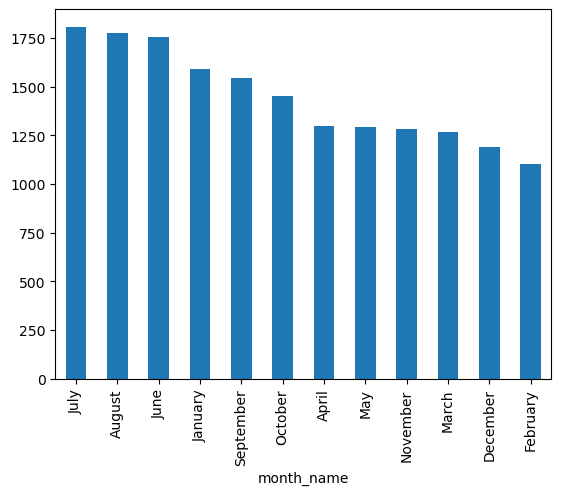

In [298]:
df["month_name"].value_counts().plot(kind="bar")

<Axes: xlabel='day'>

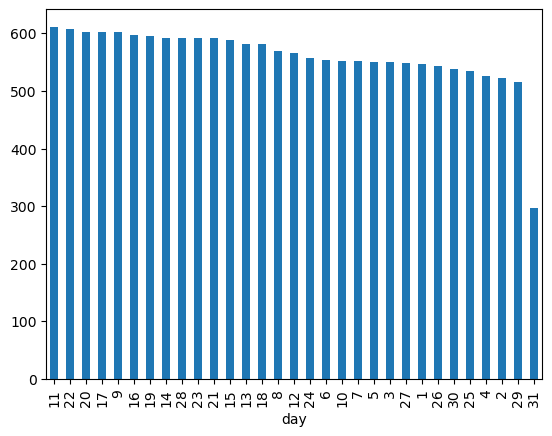

In [299]:
df['day'].value_counts().plot(kind="bar")

In [300]:
df

,Event Date,NAICS,Event Description,abstract,keyword,date,age,sex,degree,occupation,...,minute,time_interval,Keywords,new_Keywords,Keyword,Event Type,Env Factor,Nature of Injury,new,new2
0,2023-08-31,238220.0,Employee Dies From Head Trauma In Fall While F...,"['Abstract: \nAt 11:00 a.m. on August 31, 2023...","['Keywords: \nblunt force, blunt force trauma,...",09/07/2023,44.0,M,Fatality,Personnel and labor relations managers,...,0,11.0,"[' \NBLUNT FORCE, BLUNT FORCE TRAUMA, CONCRETE...","[' \nblunt force, blunt force trauma, concrete...","[' \nblunt force, blunt force trauma, concrete...","FALL, FALL FROM ELEVATION, FALL, REPA",NaN,"TRAUMA, FALL, FALL, FALL, HEAD, HEAD",HEAD,Head_Neck
1,2023-08-30,238130.0,Employee Dies Of Head Trauma In Fall Attaching...,"['Abstract: \nAt 4:45 p.m. on August 30, 2023,...","['Keywords: \nanchor, blunt force, blunt force...",09/05/2023,25.0,M,Fatality,Construction laborers,...,45,5.0,"[' \NANCHOR, BLUNT FORCE, BLUNT FORCE TRAUMA, ...","[' \nanchor, blunt force, blunt force trauma, ...","[' \nanchor, blunt force, blunt force trauma, ...","FALL, FALL FROM ELEVATION, FALL",NaN,"TRAUMA, FALL, FALL, FALL, FRACTURE, HEAD",HEAD,Head_Neck
2,2023-08-30,237310.0,Employee Is Killed When Struck By Dump Truck,"[""Abstract: \nAt 12:00 a.m. on August 30, 2023...","['Keywords: \nasphalt, blunt force, crushed, d...",08/31/2023,53.0,M,Fatality,Occupation not reported,...,0,12.0,"[' \NASPHALT, BLUNT FORCE, CRUSHED, DUMP TRUCK...","[' \nasphalt, blunt force, crushed, dump truck...","[' \nasphalt, blunt force, crushed, dump truck...",STRUCK BY,NaN,NaN,STRUCK BY,NA
3,2023-08-30,238130.0,Employee Is Killed In Fall From Truss,"['Abstract: \nAt 2:00 p.m. on August 30, 2023,...","['Keywords: \nconcrete, fall, fall from elevat...",09/01/2023,64.0,M,Fatality,Construction laborers,...,0,2.0,"[' \NCONCRETE, FALL, FALL FROM ELEVATION, FRAC...","[' \nconcrete, fall, fall from elevation, frac...","[' \nconcrete, fall, fall from elevation, frac...","FALL, FALL FROM ELEVATION",NaN,"FALL, FALL, FRACTURE",SKULL,Head_Neck
4,2023-08-29,238160.0,Employee Is Killed In Fall From Roof,"['Abstract: \nAt 2:00 p.m. on August 29, 2023,...","['Keywords: \nabdomen, adhesive, blunt force t...",08/31/2023,30.0,M,Fatality,Roofers,...,0,2.0,"[' \NABDOMEN, ADHESIVE, BLUNT FORCE TRAUMA, CO...","[' \nabdomen, adhesive, blunt force trauma, co...","[' \nabdomen, adhesive, blunt force trauma, co...","FALL, FALL FROM ELEVATION, FALL",NaN,"TRAUMA, CONTUSION, FALL, FALL, FALL, FRACTURE,...",HEAD,Head_Neck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,2008-05-22,238210.0,Employee'S Head Is Injured In Fall From Teleph...,"['Abstract: \nOn May 22, 2008, Employee #1, of...","['Keywords: \nhead, demolition, construction, ...",05/30/2008,NaN,NaN,Hospitalized injury,Electrical and electronic technicians,...,42,12.5,"[' \NHEAD, DEMOLITION, CONSTRUCTION, FALL, CON...","[' \nhead, demolition, construction, fall, con...","[' \nhead, demolition, construction, fall, con...",FALL,NaN,"HEAD, FALL",HEAD,Head_Neck
17356,2008-05-21,238160.0,Employee Dies After Fall From Roof,"['Abstract: \nOn May 21, 2008, Employee #1, a ...","['Keywords: \nhead, roof, construction, roofer...",05/21/2008,NaN,NaN,Fatality,Roofers,...,42,12.5,"[' \NHEAD, ROOF, CONSTRUCTION, ROOFER, FALL, C...","[' \nhead, roof, construction, roofer, fall, c...","[' \nhead, roof, construction, roofer, fall, c...",FALL,NaN,"HEAD, FALL",HEAD,Head_Neck
17357,2008-05-21,238320.0,Employee'S Head Is Injured In Fall From Ladder,['Abstract: \nAt approximately 2:15 p.m. on Ma...,"['Keywords: \nhead, extension ladder, construc...",06/02/2008,NaN,NaN,Hospitalized injury,"Painters, construction and maintenance",...,15,2.0,"[' \NHEAD, EXTENSION LADDER, CONSTRUCTION, FAL...","[' \nhead, extension ladder, construction, fal...","[' \nhead, extension ladder, construction, fal...",FALL,NaN,"HEAD, FALL",HEAD,Head_Neck
17358,2008-05-21,238210.0,Electrician Is Burned By Arc Flash At

In [301]:
keywords = ['HEAD', 'FINGER', 'LEG', 'BACK', 'BRAIN', 'NECK', 'CARDIAC ARREST', 'HEART','AMPUTATED',
            'UNCONSCIOUSNESS','FAINTED','AMPUTATION','HEAT','ASPHYXIATED','NAIL','SKULL',
            'TRAFFIC ACCIDENT','RIB','ELECTROCUTED','COLLAPSE','TORSO','SHOULDER','FOOT','SLIPS','ELECTRIC SHOCK',
            'CHEMICAL','ARM','SLIP','ALLERGIC REACTION','HAND'
           ,'STRUCK BY','BURN','HIP','PINNED','SAW','DROWN','POWERED INDUSTRIAL VEHICLE','EQUIPMENT FAILURE','KNEE','EYE','THUMB','PELVIS']

# Function to add the keyword if 'NA', otherwise keep the existing value
def add_keyword(row):
    if row['new2'] == 'NA':
        for keyword in keywords:
            if keyword in row['keyword']:
                return keyword
    return row['new']

# Apply the function to create or update the "new" column
df['new2'] = df.apply(add_keyword, axis=1)

# Now, the 'new' column will be updated with keywords from "Event Description" only if it was 'NA' initially, otherwise it will keep the existing non-'NA' values.
print(df)

      Event Date     NAICS                                  Event Description  \
0     2023-08-31  238220.0  Employee Dies From Head Trauma In Fall While F...   
1     2023-08-30  238130.0  Employee Dies Of Head Trauma In Fall Attaching...   
2     2023-08-30  237310.0       Employee Is Killed When Struck By Dump Truck   
3     2023-08-30  238130.0              Employee Is Killed In Fall From Truss   
4     2023-08-29  238160.0               Employee Is Killed In Fall From Roof   
...          ...       ...                                                ...   
17355 2008-05-22  238210.0  Employee'S Head Is Injured In Fall From Teleph...   
17356 2008-05-21  238160.0                 Employee Dies After Fall From Roof   
17357 2008-05-21  238320.0     Employee'S Head Is Injured In Fall From Ladder   
17358 2008-05-21  238210.0  Electrician Is Burned By Arc Flash At Electric...   
17359 2008-05-21       NaN  Employee Is Electrocuted In Air Handling Equip...   

                           

<Axes: xlabel='Time'>

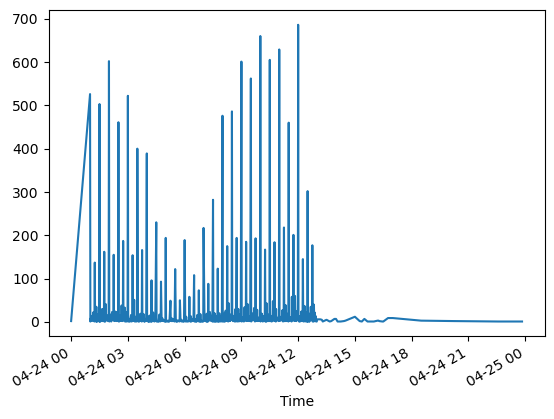

In [302]:
df["Time"].value_counts().plot()

In [303]:
keywords = ['HEAD','BRAIN', 'NECK','FAINTED','SKULL']
def add_keyword(text):
    for keyword in keywords:
        if keyword in text:
            return "head_neck"
    return 'NA'
    
df["new2"]=df["new"].apply(add_keyword)

In [304]:
keywords = ['HEAD','BRAIN', 'NECK','FAINTED','SKULL','EYE']
def add_keyword(text):
    for keyword in keywords:
        if keyword in text:
            return "head_neck"
    return 'NA'
    
df["new2"]=df["new"].apply(add_keyword)

In [305]:
keywords = ['BACK','RIB','TORSO','SHOULDER','HIP','PELVIS']
def add_keyword(row):
    if row['new2'] == 'NA':
        for keyword in keywords:
            if keyword in row['new']:
                return "back"
    return row['new2']

# Apply the function to create or update the "new" column
df['new2'] = df.apply(add_keyword, axis=1)



In [306]:
keywords = ['FINGER','NAIL','HAND','AMPUTATION','AMPUTATED','ARM','THUMB','SAW','FiNGERS']
def add_keyword(row):
    if row['new2'] == 'NA':
        for keyword in keywords:
            if keyword in row['new']:
                return "upper_limb"
    return row['new2']

# Apply the function to create or update the "new" column
df['new2'] = df.apply(add_keyword, axis=1)


In [307]:
keywords = ['FOOT','KNEE','SLIPS','LEG','SLIP','STRUCK BY','KNEE']
def add_keyword(row):
    if row['new2'] == 'NA':
        for keyword in keywords:
            if keyword in row['new']:
                return "lower_limb"
    return row['new2']

# Apply the function to create or update the "new" column
df['new2'] = df.apply(add_keyword, axis=1)

In [308]:
df['new2']=df['new2'].replace('NA',np.nan)

In [309]:
df["new2"]=df["new2"].fillna('other')

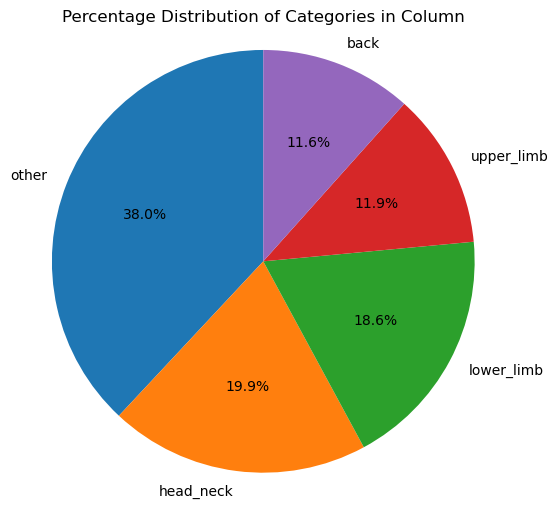

In [310]:
value_counts = df['new2'].value_counts()

# Extract the counts and labels
counts = value_counts.values
labels = value_counts.index

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Percentage Distribution of Categories in Column')
plt.show()

In [311]:
df.duplicated().sum()

2

In [312]:
df.drop_duplicates(inplace=True)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17358 entries, 0 to 17359
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Event Date         17358 non-null  datetime64[ns]
 1   NAICS              17213 non-null  float64       
 2   Event Description  17358 non-null  object        
 3   abstract           17358 non-null  object        
 4   keyword            17358 non-null  object        
 5   date               17355 non-null  object        
 6   age                11869 non-null  float64       
 7   sex                11878 non-null  object        
 8   degree             17274 non-null  object        
 9   occupation         16783 non-null  object        
 10  Time               17358 non-null  datetime64[ns]
 11  day_of_week        17358 non-null  int32         
 12  Day_of_Week        17358 non-null  object        
 13  Month              17358 non-null  int32         
 14  month_name 

<Axes: xlabel='sex'>

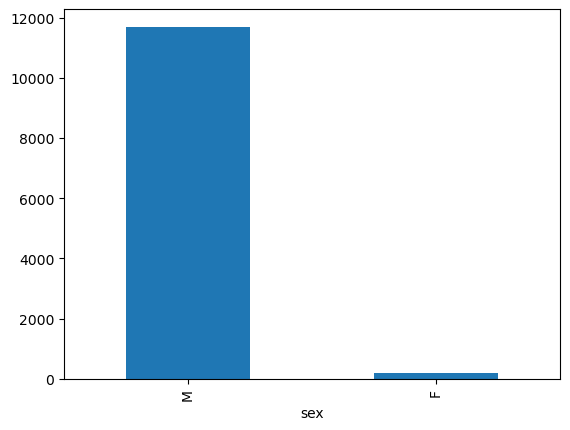

In [314]:
df['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='Day_of_Week'>

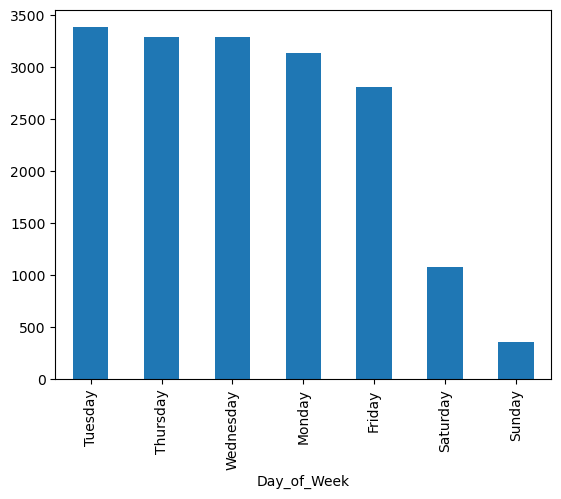

In [315]:
df['Day_of_Week'].value_counts().plot(kind='bar')

<Axes: xlabel='degree'>

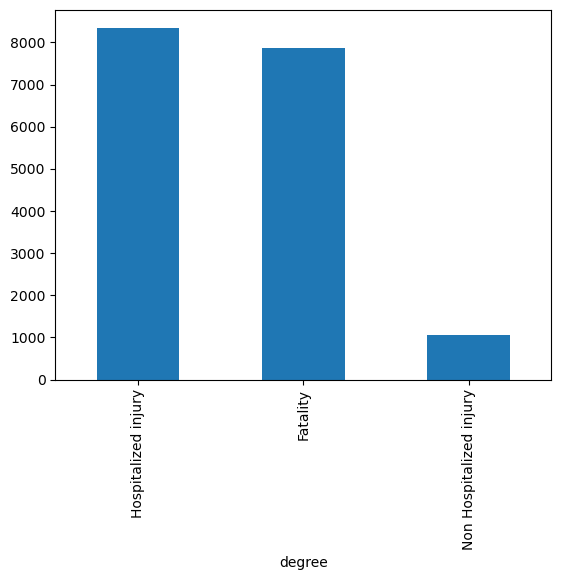

In [316]:
df['degree'].value_counts().plot(kind='bar')

In [317]:
df['occupation'].value_counts()


occupation
Construction laborers                                                                                                                            2461
Occupation not reported                                                                                                                          2454
Carpenters                                                                                                                                       1200
Roofers                                                                                                                                          1198
Laborers, except construction                                                                                                                     874
                                                                                                                                                 ... 
Distance of Fall: 57 feet Worker Height Above Ground/Floor: 57 feet Cause: Steel Erection

In [318]:
df

,Event Date,NAICS,Event Description,abstract,keyword,date,age,sex,degree,occupation,...,minute,time_interval,Keywords,new_Keywords,Keyword,Event Type,Env Factor,Nature of Injury,new,new2
0,2023-08-31,238220.0,Employee Dies From Head Trauma In Fall While F...,"['Abstract: \nAt 11:00 a.m. on August 31, 2023...","['Keywords: \nblunt force, blunt force trauma,...",09/07/2023,44.0,M,Fatality,Personnel and labor relations managers,...,0,11.0,"[' \NBLUNT FORCE, BLUNT FORCE TRAUMA, CONCRETE...","[' \nblunt force, blunt force trauma, concrete...","[' \nblunt force, blunt force trauma, concrete...","FALL, FALL FROM ELEVATION, FALL, REPA",NaN,"TRAUMA, FALL, FALL, FALL, HEAD, HEAD",HEAD,head_neck
1,2023-08-30,238130.0,Employee Dies Of Head Trauma In Fall Attaching...,"['Abstract: \nAt 4:45 p.m. on August 30, 2023,...","['Keywords: \nanchor, blunt force, blunt force...",09/05/2023,25.0,M,Fatality,Construction laborers,...,45,5.0,"[' \NANCHOR, BLUNT FORCE, BLUNT FORCE TRAUMA, ...","[' \nanchor, blunt force, blunt force trauma, ...","[' \nanchor, blunt force, blunt force trauma, ...","FALL, FALL FROM ELEVATION, FALL",NaN,"TRAUMA, FALL, FALL, FALL, FRACTURE, HEAD",HEAD,head_neck
2,2023-08-30,237310.0,Employee Is Killed When Struck By Dump Truck,"[""Abstract: \nAt 12:00 a.m. on August 30, 2023...","['Keywords: \nasphalt, blunt force, crushed, d...",08/31/2023,53.0,M,Fatality,Occupation not reported,...,0,12.0,"[' \NASPHALT, BLUNT FORCE, CRUSHED, DUMP TRUCK...","[' \nasphalt, blunt force, crushed, dump truck...","[' \nasphalt, blunt force, crushed, dump truck...",STRUCK BY,NaN,NaN,STRUCK BY,lower_limb
3,2023-08-30,238130.0,Employee Is Killed In Fall From Truss,"['Abstract: \nAt 2:00 p.m. on August 30, 2023,...","['Keywords: \nconcrete, fall, fall from elevat...",09/01/2023,64.0,M,Fatality,Construction laborers,...,0,2.0,"[' \NCONCRETE, FALL, FALL FROM ELEVATION, FRAC...","[' \nconcrete, fall, fall from elevation, frac...","[' \nconcrete, fall, fall from elevation, frac...","FALL, FALL FROM ELEVATION",NaN,"FALL, FALL, FRACTURE",SKULL,head_neck
4,2023-08-29,238160.0,Employee Is Killed In Fall From Roof,"['Abstract: \nAt 2:00 p.m. on August 29, 2023,...","['Keywords: \nabdomen, adhesive, blunt force t...",08/31/2023,30.0,M,Fatality,Roofers,...,0,2.0,"[' \NABDOMEN, ADHESIVE, BLUNT FORCE TRAUMA, CO...","[' \nabdomen, adhesive, blunt force trauma, co...","[' \nabdomen, adhesive, blunt force trauma, co...","FALL, FALL FROM ELEVATION, FALL",NaN,"TRAUMA, CONTUSION, FALL, FALL, FALL, FRACTURE,...",HEAD,head_neck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,2008-05-22,238210.0,Employee'S Head Is Injured In Fall From Teleph...,"['Abstract: \nOn May 22, 2008, Employee #1, of...","['Keywords: \nhead, demolition, construction, ...",05/30/2008,NaN,NaN,Hospitalized injury,Electrical and electronic technicians,...,42,12.5,"[' \NHEAD, DEMOLITION, CONSTRUCTION, FALL, CON...","[' \nhead, demolition, construction, fall, con...","[' \nhead, demolition, construction, fall, con...",FALL,NaN,"HEAD, FALL",HEAD,head_neck
17356,2008-05-21,238160.0,Employee Dies After Fall From Roof,"['Abstract: \nOn May 21, 2008, Employee #1, a ...","['Keywords: \nhead, roof, construction, roofer...",05/21/2008,NaN,NaN,Fatality,Roofers,...,42,12.5,"[' \NHEAD, ROOF, CONSTRUCTION, ROOFER, FALL, C...","[' \nhead, roof, construction, roofer, fall, c...","[' \nhead, roof, construction, roofer, fall, c...",FALL,NaN,"HEAD, FALL",HEAD,head_neck
17357,2008-05-21,238320.0,Employee'S Head Is Injured In Fall From Ladder,['Abstract: \nAt approximately 2:15 p.m. on Ma...,"['Keywords: \nhead, extension ladder, construc...",06/02/2008,NaN,NaN,Hospitalized injury,"Painters, construction and maintenance",...,15,2.0,"[' \NHEAD, EXTENSION LADDER, CONSTRUCTION, FAL...","[' \nhead, extension ladder, construction, fal...","[' \nhead, extension ladder, construction, fal...",FALL,NaN,"HEAD, FALL",HEAD,head_neck
17358,2008-05-21,238210.0,Electrician Is Burned By Arc 

In [319]:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column containing the phrases
# Extract the starting word of each element in the specified column
df['Event Type'] = df['Event Type'].str.split(',').str[0].str.strip().str.upper()




In [320]:
df['Nature of Injury'] = df['Event Type'].str.split(',').str[0].str.strip().str.upper()

In [321]:
df["Nature of Injury"]=df["Nature of Injury"].fillna('other')

In [322]:
df['Event Type']=df['Event Type'].fillna('other')

In [323]:
df['Nature of Injury'].value_counts()

Nature of Injury
FALL                   8886
other                  4426
STRUCK BY              2335
SHOCK                   684
STRUCK AGAINST          385
REPA                    285
PRESSURE                138
STING                   108
RESPIRATORY              51
INHALATION               48
BITE                      6
FALL FROM ELEVATION       6
Name: count, dtype: int64

In [324]:
df['Event Type'].value_counts()

Event Type
FALL                   8886
other                  4426
STRUCK BY              2335
SHOCK                   684
STRUCK AGAINST          385
REPA                    285
PRESSURE                138
STING                   108
RESPIRATORY              51
INHALATION               48
BITE                      6
FALL FROM ELEVATION       6
Name: count, dtype: int64

In [325]:
df.dropna()
df

,Event Date,NAICS,Event Description,abstract,keyword,date,age,sex,degree,occupation,...,minute,time_interval,Keywords,new_Keywords,Keyword,Event Type,Env Factor,Nature of Injury,new,new2
0,2023-08-31,238220.0,Employee Dies From Head Trauma In Fall While F...,"['Abstract: \nAt 11:00 a.m. on August 31, 2023...","['Keywords: \nblunt force, blunt force trauma,...",09/07/2023,44.0,M,Fatality,Personnel and labor relations managers,...,0,11.0,"[' \NBLUNT FORCE, BLUNT FORCE TRAUMA, CONCRETE...","[' \nblunt force, blunt force trauma, concrete...","[' \nblunt force, blunt force trauma, concrete...",FALL,NaN,FALL,HEAD,head_neck
1,2023-08-30,238130.0,Employee Dies Of Head Trauma In Fall Attaching...,"['Abstract: \nAt 4:45 p.m. on August 30, 2023,...","['Keywords: \nanchor, blunt force, blunt force...",09/05/2023,25.0,M,Fatality,Construction laborers,...,45,5.0,"[' \NANCHOR, BLUNT FORCE, BLUNT FORCE TRAUMA, ...","[' \nanchor, blunt force, blunt force trauma, ...","[' \nanchor, blunt force, blunt force trauma, ...",FALL,NaN,FALL,HEAD,head_neck
2,2023-08-30,237310.0,Employee Is Killed When Struck By Dump Truck,"[""Abstract: \nAt 12:00 a.m. on August 30, 2023...","['Keywords: \nasphalt, blunt force, crushed, d...",08/31/2023,53.0,M,Fatality,Occupation not reported,...,0,12.0,"[' \NASPHALT, BLUNT FORCE, CRUSHED, DUMP TRUCK...","[' \nasphalt, blunt force, crushed, dump truck...","[' \nasphalt, blunt force, crushed, dump truck...",STRUCK BY,NaN,STRUCK BY,STRUCK BY,lower_limb
3,2023-08-30,238130.0,Employee Is Killed In Fall From Truss,"['Abstract: \nAt 2:00 p.m. on August 30, 2023,...","['Keywords: \nconcrete, fall, fall from elevat...",09/01/2023,64.0,M,Fatality,Construction laborers,...,0,2.0,"[' \NCONCRETE, FALL, FALL FROM ELEVATION, FRAC...","[' \nconcrete, fall, fall from elevation, frac...","[' \nconcrete, fall, fall from elevation, frac...",FALL,NaN,FALL,SKULL,head_neck
4,2023-08-29,238160.0,Employee Is Killed In Fall From Roof,"['Abstract: \nAt 2:00 p.m. on August 29, 2023,...","['Keywords: \nabdomen, adhesive, blunt force t...",08/31/2023,30.0,M,Fatality,Roofers,...,0,2.0,"[' \NABDOMEN, ADHESIVE, BLUNT FORCE TRAUMA, CO...","[' \nabdomen, adhesive, blunt force trauma, co...","[' \nabdomen, adhesive, blunt force trauma, co...",FALL,NaN,FALL,HEAD,head_neck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,2008-05-22,238210.0,Employee'S Head Is Injured In Fall From Teleph...,"['Abstract: \nOn May 22, 2008, Employee #1, of...","['Keywords: \nhead, demolition, construction, ...",05/30/2008,NaN,NaN,Hospitalized injury,Electrical and electronic technicians,...,42,12.5,"[' \NHEAD, DEMOLITION, CONSTRUCTION, FALL, CON...","[' \nhead, demolition, construction, fall, con...","[' \nhead, demolition, construction, fall, con...",FALL,NaN,FALL,HEAD,head_neck
17356,2008-05-21,238160.0,Employee Dies After Fall From Roof,"['Abstract: \nOn May 21, 2008, Employee #1, a ...","['Keywords: \nhead, roof, construction, roofer...",05/21/2008,NaN,NaN,Fatality,Roofers,...,42,12.5,"[' \NHEAD, ROOF, CONSTRUCTION, ROOFER, FALL, C...","[' \nhead, roof, construction, roofer, fall, c...","[' \nhead, roof, construction, roofer, fall, c...",FALL,NaN,FALL,HEAD,head_neck
17357,2008-05-21,238320.0,Employee'S Head Is Injured In Fall From Ladder,['Abstract: \nAt approximately 2:15 p.m. on Ma...,"['Keywords: \nhead, extension ladder, construc...",06/02/2008,NaN,NaN,Hospitalized injury,"Painters, construction and maintenance",...,15,2.0,"[' \NHEAD, EXTENSION LADDER, CONSTRUCTION, FAL...","[' \nhead, extension ladder, construction, fal...","[' \nhead, extension ladder, construction, fal...",FALL,NaN,FALL,HEAD,head_neck
17358,2008-05-21,238210.0,Electrician Is Burned By Arc Flash At Electric...,"['Abstract: \nAt approximately 3:30 PM, on May...","['Keywords: \nburn, electric arc, electrician,...",05/22/2008,NaN,NaN,Hospitalized injury,Occupation not reported,...,30,15.5,"[' \NBURN, ELECTRIC ARC, ELECTRICIAN, CONSTRUC...","[' \nburn, electri

In [326]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
np.random.seed(42)

In [236]:
column_to_drop=["Event Description",'occupation',
                "abstract","Keywords","new_Keywords","keyword",'Time',"Keyword","date","new","Day_of_Week","month_name","Event Date","time_interval","hour","minute",'year']

In [237]:
df1=df.drop(column_to_drop, axis=1)
df1

,NAICS,age,sex,degree,day_of_week,Month,day,Event Type,Nature of Injury,new2
0,238220.0,44.0,M,Fatality,3,8,31,FALL,FALL,head_neck
1,238130.0,25.0,M,Fatality,2,8,30,FALL,FALL,head_neck
2,237310.0,53.0,M,Fatality,2,8,30,STRUCK BY,STRUCK BY,lower_limb
3,238130.0,64.0,M,Fatality,2,8,30,FALL,FALL,head_neck
4,238160.0,30.0,M,Fatality,1,8,29,FALL,FALL,head_neck
...,...,...,...,...,...,...,...,...,...,...
17355,238210.0,NaN,NaN,Hospitalized injury,3,5,22,FALL,FALL,head_neck
17356,238160.0,NaN,NaN,Fatality,2,5,21,FALL,FALL,head_neck
17357,238320.0,NaN,NaN,Hospitalized injury,2,5,21,FALL,FALL,head_neck
17358,238210.0,NaN,NaN,Hospitalized injury,2,5,21,other,other,upper_limb


In [238]:
df1=df1.dropna()
df1

,NAICS,age,sex,degree,day_of_week,Month,day,Event Type,Nature of Injury,new2
0,238220.0,44.0,M,Fatality,3,8,31,FALL,FALL,head_neck
1,238130.0,25.0,M,Fatality,2,8,30,FALL,FALL,head_neck
2,237310.0,53.0,M,Fatality,2,8,30,STRUCK BY,STRUCK BY,lower_limb
3,238130.0,64.0,M,Fatality,2,8,30,FALL,FALL,head_neck
4,238160.0,30.0,M,Fatality,1,8,29,FALL,FALL,head_neck
...,...,...,...,...,...,...,...,...,...,...
13954,238320.0,28.0,M,Fatality,5,6,4,other,other,other
13964,238140.0,71.0,M,Fatality,1,5,31,FALL,FALL,other
13974,238210.0,48.0,M,Fatality,2,5,25,other,other,other
14002,238990.0,24.0,M,Fatality,1,5,10,STRUCK BY,STRUCK BY,lower_limb


In [239]:
X=df1.iloc[:,:-1]
X

,NAICS,age,sex,degree,day_of_week,Month,day,Event Type,Nature of Injury
0,238220.0,44.0,M,Fatality,3,8,31,FALL,FALL
1,238130.0,25.0,M,Fatality,2,8,30,FALL,FALL
2,237310.0,53.0,M,Fatality,2,8,30,STRUCK BY,STRUCK BY
3,238130.0,64.0,M,Fatality,2,8,30,FALL,FALL
4,238160.0,30.0,M,Fatality,1,8,29,FALL,FALL
...,...,...,...,...,...,...,...,...,...
13954,238320.0,28.0,M,Fatality,5,6,4,other,other
13964,238140.0,71.0,M,Fatality,1,5,31,FALL,FALL
13974,238210.0,48.0,M,Fatality,2,5,25,other,other
14002,238990.0,24.0,M,Fatality,1,5,10,STRUCK BY,STRUCK BY


In [240]:
y=df.iloc[:,-1]
y

0         head_neck
1         head_neck
2        lower_limb
3         head_neck
4         head_neck
            ...    
17355     head_neck
17356     head_neck
17357     head_neck
17358    upper_limb
17359     head_neck
Name: new2, Length: 17358, dtype: object

In [242]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["sex", "degree","Event Type","Nature of Injury"]

# Initialize the OneHotEncoder with drop='first'
one_hot = OneHotEncoder(sparse=False, drop='first')

# Initialize the ColumnTransformer to apply OneHotEncoding to categorical features
transformer = ColumnTransformer(transformers=[("one_hot", one_hot, categorical_features)], remainder="passthrough")

# Transform the data
transformed_X = transformer.fit_transform(X)
transformed_X.shape

/Users/divyabhat/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(11860, 30)

In [243]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a sample DataFrame

# Extract the column you want to label encode as a Series
column_to_encode = df1['new2']

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data using LabelEncoder
encoded_data = label_encoder.fit_transform(column_to_encode)

df1['transformed']=encoded_data

/var/folders/2g/ngjdw0bx2xzff_6zbb624q740000gn/T/ipykernel_38454/145259098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['transformed']=encoded_data


In [244]:
transformed_y=df1['transformed']

In [245]:
from sklearn.model_selection import train_test_split
np.random.seed(150)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,transformed_y,test_size=0.2)

In [246]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [247]:
X_train_scaled.shape

(9488, 30)

In [251]:
from sklearn.ensemble import RandomForestClassifier  # Import the model you want to use

# Create the model
model1 = RandomForestClassifier(n_estimators=100)  # Example model (you should choose the appropriate model for your task)

# Fit the model on the training data
model1.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [254]:
model1.score(X_train_scaled,y_train)

0.9989460370994941

In [255]:
model1.score(X_test_scaled,y_test)

0.43802698145025293

In [256]:
import xgboost as xgb

In [257]:
accuracy

NameError: name 'accuracy' is not defined

In [258]:
model2 = xgb.XGBClassifier(learning_rate=0.01)  

model2.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [259]:
model2.score(X_test_scaled,y_test)

0.44898819561551434

In [260]:
model2.score(X_train_scaled,y_train)

0.5065345699831366

In [261]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(model2,X_test_scaled,y_test,cv=10))
y_predicted = model1.predict(transformed_X)

In [262]:
from sklearn.metrics import precision_score

# Your true labels and predicted labels

# Calculate precision for each class
precision = precision_score(transformed_y, y_predicted, average=None)

# Micro-Averaging
micro_precision = precision_score(transformed_y, y_predicted, average='micro')

# Macro-Averaging
macro_precision = precision_score(transformed_y, y_predicted, average='macro')

# Weighted-Averaging
weighted_precision = precision_score(transformed_y, y_predicted, average='weighted')

print("Precision for each class:", precision)
print("Micro Precision:", micro_precision)
print("Macro Precision:", macro_precision)
print("Weighted Precision:", weighted_precision)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Your true labels and predicted labels
true_labels = transformed_y
predicted_labels = y_predicted

precision = precision_score(true_labels, predicted_labels, average='weighted')  # or average='ovr'
recall = recall_score(true_labels, predicted_labels, average='weighted')  # or average='ovr'
f1 = f1_score(true_labels, predicted_labels, average='weighted')



Precision for each class: [0.23525206 0.26390977 0.37449393 0.55659641 0.5150079 ]
Micro Precision: 0.4154300168634064
Macro Precision: 0.389052013057044
Weighted Precision: 0.41787391322618617
